# An Exploratory Data Analysis of The US Police Shootings

In [144]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as st

%matplotlib inline

In [3]:
#Reading the csv file and converting it to a dataframe with pandas for analysis with name data
data = pd.read_csv('shootings.csv')

# 1. Understanding The Data

## This consists of an extensive exploration of the dataset to fully understand the contents and description of the dataset 

In [4]:
#Getting an overview of what the data contains
#Including the various columns that make up the dataset
data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


In [5]:
# Checking the first 5 rows of the dataset to get an idea of the dataset
# This is to check to see if the data loading process was done appropriately
# The .head() method helps to get this in place
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [6]:
#Checking the last 5 rows of the dataset to get an idea of the dataset
#This is to check to see if the loading was done appropriately and none of the last five rows contain weird values
#The .tail() method helps to get this in place
data.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns
4894,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,White,Lawrence,KS,False,attack,Car,False,Guns


##### The above output shows that the last 5 rows of our dataset has no issues

In [7]:
#This is to get the total number of rows and columns in the dataset
#This gives an overview of what the whole data entails
#It returns a tuple with the first entry for the rows and the second the total number of columns including the part for the ids given by Jupyter
data.shape

(4895, 15)

In [8]:
#This gives an overview of the number of rows in the dataset
data.index

RangeIndex(start=0, stop=4895, step=1)

In [9]:
#Also, it will be important to get the scope of numerical values in the dataset
#These will include the minimum, maximum, count, standard deviations and the various percentile values
#The results show that the max age is 91 and the max id is 5925. 
data.describe()

,id,age
count,4895.000000,4895.000000
mean,2902.148519,36.549750
std,1683.467910,12.694348
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000


In [10]:
#Data is well explored when we know all that the values each column holds,
# their data types, and whether some have null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
id                         4895 non-null int64
name                       4895 non-null object
date                       4895 non-null object
manner_of_death            4895 non-null object
armed                      4895 non-null object
age                        4895 non-null float64
gender                     4895 non-null object
race                       4895 non-null object
city                       4895 non-null object
state                      4895 non-null object
signs_of_mental_illness    4895 non-null bool
threat_level               4895 non-null object
flee                       4895 non-null object
body_camera                4895 non-null bool
arms_category              4895 non-null object
dtypes: bool(2), float64(1), int64(1), object(11)
memory usage: 506.8+ KB


In [11]:
#In exploring this dataset, it will be great to know the various names of all the columns as a list
data.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category'],
      dtype='object')

In [12]:
#To check whether any of the columns have a null value
#There are no missing values in the dataset
data.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

In [13]:
#To get a snippet of the unique names in the dataset
data['name'].unique()

array(['Tim Elliot', 'Lewis Lee Lembke', 'John Paul Quintero', ...,
       'Hannah Fizer', 'William Slyter', 'Nicholas Hirsh'], dtype=object)

In [14]:
data['name'].describe()
#Further research on the frequency of "TK" revealed that those columns were incomplete, and were "to come" later on

count      4895
unique     4851
top       TK TK
freq         29
Name: name, dtype: object

In [15]:
#To get the total number of all the values that make up the name column
data.name.value_counts(ascending=True, dropna = False)

Levonia Riggins         1
Kevin Lamont Judson     1
Dorgel Cisnero-Mesa     1
Jose Eduardo Flores     1
Donald S. Myers         1
                       ..
Michael Brown           2
Michael Johnson         2
Brandon Jones           2
Eric Harris             2
TK TK                  29
Name: name, Length: 4851, dtype: int64

In [16]:
#To get an array of the various unique dates in the data
data['date'].unique()

array(['2015-01-02', '2015-01-03', '2015-01-04', ..., '2020-06-12',
       '2020-06-13', '2020-06-15'], dtype=object)

In [17]:
data['date'].describe()

count           4895
unique          1792
top       2018-04-01
freq               9
Name: date, dtype: object

In [18]:
#To get the total count of each value that makes up the date column
data.date.value_counts(ascending=True, dropna = False)

2020-02-22    1
2016-05-06    1
2015-10-27    1
2017-11-16    1
2018-01-13    1
             ..
2019-12-10    8
2018-03-12    8
2018-01-06    9
2018-06-29    9
2018-04-01    9
Name: date, Length: 1792, dtype: int64

In [19]:
#To get an array of the various unique manner_of_death in the data
data['manner_of_death'].unique()

array(['shot', 'shot and Tasered'], dtype=object)

In [20]:
data['manner_of_death'].describe()

count     4895
unique       2
top       shot
freq      4647
Name: manner_of_death, dtype: object

In [21]:
#To get the total count of each value that makes up the manner_of_death column
data.manner_of_death.value_counts(ascending=True, dropna=False)

shot and Tasered     248
shot                4647
Name: manner_of_death, dtype: int64

In [22]:
#To get an array of the various unique armed values in the data
data['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'unknown',
       'shovel', 'hammer', 'hatchet', 'sword', 'machete', 'box cutter',
       'metal object', 'screwdriver', 'lawn mower blade', 'flagpole',
       'guns and explosives', 'cordless drill', 'metal pole', 'Taser',
       'metal pipe', 'metal hand tool', 'blunt object', 'metal stick',
       'sharp object', 'meat cleaver', 'carjack', 'chain',
       "contractor's level", 'stapler', 'crossbow', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'vehicle', 'spear', 'chair', 'pitchfork',
       'hatchet and gun', 'rock', 'piece of wood', 'bayonet', 'pipe',
       'glass shard', 'motorcycle', 'pepper spray', 'metal rake', 'baton',
       'crowbar', 'oar', 'machete and gun', 'air conditioner',
       'pole and knife', 'beer bottle', 'base

In [23]:
data['armed'].describe()
#This preliminary exploration showed that more than half of the armed victims had a gun in their possession

count     4895
unique      89
top        gun
freq      2755
Name: armed, dtype: object

In [24]:
#To get the total count of each value that makes up the armed column
data.armed.value_counts(ascending=True, dropna=False)

grenade             1
walking stick       1
motorcycle          1
oar                 1
nail gun            1
                 ... 
toy weapon        171
unarmed           348
unknown           418
knife             708
gun              2755
Name: armed, Length: 89, dtype: int64

In [25]:
#To get an array of the various unique age values in the data
data['age'].unique()
#This exploration was an early indication of one outlier within the age column

array([53.       , 47.       , 23.       , 32.       , 39.       ,
       18.       , 22.       , 35.       , 34.       , 25.       ,
       31.       , 41.       , 30.       , 37.       , 28.       ,
       42.       , 36.       , 49.       , 71.       , 33.       ,
       29.       , 43.       , 24.       , 75.       , 68.       ,
       27.       , 48.       , 21.       , 67.       , 19.       ,
       54.       , 17.       , 56.       , 61.       , 45.       ,
       26.       , 40.       , 59.       , 38.       , 51.       ,
       74.       , 57.       , 46.       , 16.       , 50.       ,
       20.       , 77.       , 37.1179309, 58.       , 64.       ,
       52.       , 63.       , 44.       , 60.       , 66.       ,
       83.       , 72.       , 76.       , 62.       , 55.       ,
       69.       , 15.       , 65.       ,  6.       , 12.       ,
       70.       , 80.       , 14.       , 82.       , 13.       ,
       73.       , 91.       , 79.       , 78.       , 84.    

In [26]:
data['age'].describe()

count    4895.000000
mean       36.549750
std        12.694348
min         6.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64

In [27]:
#To get the total count of each value that makes up the age column
data.age.value_counts(ascending=True, dropna=False)

91.0      1
78.0      1
81.0      1
79.0      1
12.0      1
       ... 
29.0    160
33.0    164
27.0    165
31.0    174
25.0    176
Name: age, Length: 76, dtype: int64

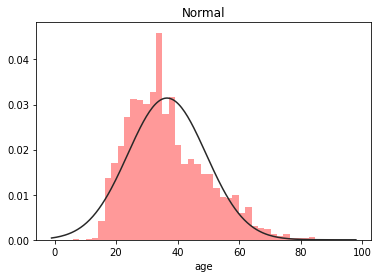

In [28]:
#Since the age column is made up of values it will be idea to have a quick check of the kind of distribution
#So here we plot the age column in a normal distribution curve to see the age distribution
y = data['age']
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm, color='red');

##### The output above shows that the age column values do not give a normal distribution.

In [29]:
#To get an array of the various unique gender values in the data
data['gender'].unique()

array(['M', 'F'], dtype=object)

In [30]:
data['gender'].describe()

count     4895
unique       2
top          M
freq      4673
Name: gender, dtype: object

In [31]:
#To get the total count of each value that makes up the gender column
data.gender.value_counts(ascending=True, dropna=False)

F     222
M    4673
Name: gender, dtype: int64

##### The 3 outputs above give an in-depth understanding of what the gender column holds, the various values and the counts of these values

In [32]:
#To get an array of the various unique race values in the data
data['race'].unique()

array(['Asian', 'White', 'Hispanic', 'Black', 'Other', 'Native'],
      dtype=object)

In [33]:
data['race'].describe()

count      4895
unique        6
top       White
freq       2476
Name: race, dtype: object

In [34]:
#To get the total count of each value that makes up the race column
data.race.value_counts(ascending=True, dropna=False)

Other         48
Native        78
Asian         93
Hispanic     902
Black       1298
White       2476
Name: race, dtype: int64

##### The 3 outputs above give an in-depth understanding of what the race column holds, the various values and the counts of these values

In [35]:
#To get an array of the various unique city values in the data
data['city'].unique()

array(['Shelton', 'Aloha', 'Wichita', ..., 'Industry', 'Paso Robles',
       'Crown Point'], dtype=object)

In [36]:
data['city'].describe()

count            4895
unique           2288
top       Los Angeles
freq               78
Name: city, dtype: object

In [37]:
#To get the total count of each value that makes up the city column
data.city.value_counts(ascending=True, dropna=False)

Suffield        1
Colbert         1
Marksville      1
Lacombe         1
Roland          1
               ..
San Antonio    40
Las Vegas      41
Houston        51
Phoenix        66
Los Angeles    78
Name: city, Length: 2288, dtype: int64

##### The 3 outputs above give an in-depth understanding of what the city column holds, the various values and the counts of these values

In [38]:
#To get an array of the various unique state values in the data
data['state'].unique()

array(['WA', 'OR', 'KS', 'CA', 'CO', 'OK', 'AZ', 'IA', 'PA', 'TX', 'OH',
       'LA', 'MT', 'UT', 'AR', 'IL', 'NV', 'NM', 'MN', 'MO', 'VA', 'NJ',
       'IN', 'KY', 'MA', 'NH', 'FL', 'ID', 'MD', 'NE', 'MI', 'GA', 'TN',
       'NC', 'AK', 'NY', 'ME', 'AL', 'MS', 'WI', 'SC', 'DE', 'DC', 'WV',
       'HI', 'WY', 'ND', 'CT', 'SD', 'VT', 'RI'], dtype=object)

In [39]:
data['state'].describe()

count     4895
unique      51
top         CA
freq       701
Name: state, dtype: object

In [40]:
#To get the total count of each value that makes up the state column
data.state.value_counts(ascending=True, dropna=False).head()

RI     4
VT     8
DE    10
ND    11
NH    12
Name: state, dtype: int64

In [41]:
#To get the total count of each value that makes up the state column
data.state.value_counts(ascending=True, dropna=False).tail()

CO    168
AZ    222
FL    324
TX    426
CA    701
Name: state, dtype: int64

##### The 3 outputs above give an in-depth understanding of what the state column holds, the various values and the counts of these values

In [42]:
#To get an array of the various unique signs_of_mental_illness values in the data
data['signs_of_mental_illness'].unique()

array([ True, False])

In [43]:
data['signs_of_mental_illness'].describe()

count      4895
unique        2
top       False
freq       3792
Name: signs_of_mental_illness, dtype: object

In [44]:
#To get the total count of each value that makes up the signs_of_mental_illness column
data.signs_of_mental_illness.value_counts(ascending=True, dropna=False)

True     1103
False    3792
Name: signs_of_mental_illness, dtype: int64

##### The 3 outputs above give an in-depth understanding of what the signs of mental illness column holds, the various values and the counts of these values

In [45]:
#To get an array of the various unique threat_level values in the data
data['threat_level'].unique()

array(['attack', 'other', 'undetermined'], dtype=object)

In [46]:
data['threat_level'].describe()

count       4895
unique         3
top       attack
freq        3160
Name: threat_level, dtype: object

In [47]:
#To get the total count of each value that makes up the threat_level column
data.threat_level.value_counts(ascending=True, dropna=False)

undetermined     207
other           1528
attack          3160
Name: threat_level, dtype: int64

##### The 3 outputs above give an in-depth understanding of what the threat level column holds, the various values and the counts of these values

In [48]:
#To get an array of the various unique flee values in the data
data['flee'].unique()

array(['Not fleeing', 'Car', 'Foot', 'Other'], dtype=object)

In [49]:
data['flee'].describe()

count            4895
unique              4
top       Not fleeing
freq             3073
Name: flee, dtype: object

In [50]:
#To get the total count of each value that makes up the flee column
data.flee.value_counts(ascending=True, dropna=False)

Other           360
Foot            642
Car             820
Not fleeing    3073
Name: flee, dtype: int64

##### The 3 outputs above give an in-depth understanding of what the flee column holds, the various values and the counts of these values

In [51]:
#To get an array of the various unique body_camera values in the data
data['body_camera'].unique()

array([False,  True])

In [52]:
data['body_camera'].describe()

count      4895
unique        2
top       False
freq       4317
Name: body_camera, dtype: object

In [53]:
#To get the total count of each value that makes up the body_camera column
data.body_camera.value_counts(ascending=True, dropna=False)

True      578
False    4317
Name: body_camera, dtype: int64

##### The 3 outputs above give an in-depth understanding of what the body camera column holds, the various values and the counts of these values

In [54]:
#To get an array of the various unique arms_category values in the data
data['arms_category'].unique()

array(['Guns', 'Unarmed', 'Other unusual objects', 'Piercing objects',
       'Sharp objects', 'Unknown', 'Blunt instruments', 'Multiple',
       'Electrical devices', 'Hand tools', 'Vehicles', 'Explosives'],
      dtype=object)

In [55]:
data['arms_category'].describe()

count     4895
unique      12
top       Guns
freq      2764
Name: arms_category, dtype: object

In [56]:
#To get the total count of each value that makes up the arms_category column
data.arms_category.value_counts(ascending=True, dropna=False)

Hand tools                  1
Explosives                  4
Electrical devices         24
Piercing objects           29
Multiple                   54
Vehicles                  121
Blunt instruments         122
Other unusual objects     192
Unarmed                   348
Unknown                   418
Sharp objects             818
Guns                     2764
Name: arms_category, dtype: int64

##### The 3 outputs above give an in-depth understanding of what the arms category column holds, the various values and the counts of these values

In [57]:
#Code to see the various deaths grouped by the dates
for group_key, group_value in data.groupby('date'):
    print(group_key)
    print(group_value)

2015-01-02
   id              name        date manner_of_death armed   age gender   race  \
0   3        Tim Elliot  2015-01-02            shot   gun  53.0      M  Asian   
1   4  Lewis Lee Lembke  2015-01-02            shot   gun  47.0      M  White   

      city state  signs_of_mental_illness threat_level         flee  \
0  Shelton    WA                     True       attack  Not fleeing   
1    Aloha    OR                    False       attack  Not fleeing   

   body_camera arms_category  
0        False          Guns  
1        False          Guns  
2015-01-03
   id                name        date   manner_of_death    armed   age gender  \
2   5  John Paul Quintero  2015-01-03  shot and Tasered  unarmed  23.0      M   

       race     city state  signs_of_mental_illness threat_level         flee  \
2  Hispanic  Wichita    KS                    False        other  Not fleeing   

   body_camera arms_category  
2        False       Unarmed  
2015-01-04
   id               name    

96  Not fleeing        False          Guns  
2015-02-09
     id              name        date manner_of_death armed   age gender  \
97  136  Kenneth Kreyssig  2015-02-09            shot   gun  61.0      M   
98  137    Desmond Luster  2015-02-09            shot   gun  45.0      M   

     race    city state  signs_of_mental_illness  threat_level         flee  \
97  White  Smyrna    ME                     True  undetermined  Not fleeing   
98  Black  Dallas    TX                    False        attack  Not fleeing   

    body_camera arms_category  
97        False          Guns  
98        False          Guns  
2015-02-10
      id                     name        date   manner_of_death    armed  \
99   139             Anthony Bess  2015-02-10              shot      gun   
100  140             Brian Fritze  2015-02-10              shot      gun   
101  138  Antonio Zambrano-Montes  2015-02-10  shot and Tasered  unarmed   

      age gender      race        city state  signs_of_mental_ill

      id           name        date manner_of_death  armed   age gender  \
228  246  Deanne Choate  2015-03-26            shot    gun  53.0      F   
229  250   Adrian Solis  2015-03-26            shot  knife  35.0      M   

         race        city state  signs_of_mental_illness threat_level  \
228     White     Gardner    KS                    False       attack   
229  Hispanic  Wilmington    CA                     True        other   

            flee  body_camera  arms_category  
228  Not fleeing        False           Guns  
229  Not fleeing        False  Sharp objects  
2015-03-27
      id              name        date manner_of_death       armed   age  \
230  245    Megan Hockaday  2015-03-27            shot       knife  26.0   
231  251      Harvey Oates  2015-03-27            shot         gun  42.0   
232  254       Angelo West  2015-03-27            shot         gun  41.0   
233  256     Gary Kendrick  2015-03-27            shot         gun  56.0   
234  257      Jamalis 

2015-05-11
      id             name        date manner_of_death    armed   age gender  \
345  437  Kelvin Goldston  2015-05-11            shot  unknown  30.0      M   
346  444       Justin Way  2015-05-11            shot    knife  28.0      M   

      race           city state  signs_of_mental_illness threat_level  \
345  Black     Fort Worth    TX                    False       attack   
346  White  St. Augustine    FL                     True        other   

            flee  body_camera  arms_category  
345          Car        False        Unknown  
346  Not fleeing        False  Sharp objects  
2015-05-12
      id                 name        date   manner_of_death    armed   age  \
347  441  D'Angelo Stallworth  2015-05-12              shot      gun  28.0   
348  450       Alec Ouzounian  2015-05-12              shot  unknown  40.0   
349  449        Bruce Zalonka  2015-05-12  shot and Tasered      gun  46.0   

    gender   race                    city state  signs_of_mental_i

444          Car        False          Guns  
2015-06-23
      id               name        date manner_of_death    armed   age gender  \
445  572        Joshua Dyer  2015-06-23            shot  unarmed  34.0      M   
446  574    Jonathan Wilson  2015-06-23            shot    knife  22.0      M   
447  575     Randall Waddel  2015-06-23            shot    knife  49.0      M   
448  726  Taylor Culbertson  2015-06-23            shot      gun  32.0      M   

      race          city state  signs_of_mental_illness threat_level  \
445  White  Indianapolis    IN                    False        other   
446  White    Hutchinson    KS                    False       attack   
447  White   Weatherford    TX                     True        other   
448  White         Omaha    NE                    False       attack   

            flee  body_camera  arms_category  
445          Car        False        Unarmed  
446  Not fleeing        False  Sharp objects  
447         Foot        False  Shar

551  Not fleeing        False          Guns  
2015-07-30
      id                 name        date   manner_of_death        armed  \
552  688         Mark Perkins  2015-07-30              shot          gun   
553  689   Ryan Daniel Vrenon  2015-07-30              shot          gun   
554  690       Philip Vallejo  2015-07-30              shot          gun   
555  691  Oscar Lotari Romero  2015-07-30  shot and Tasered  metal stick   

      age gender      race                  city state  \
552  48.0      M     White  Gardnerville Ranchos    NV   
553  25.0      M     White              Dunsmuir    CA   
554  30.0      M  Hispanic            Fort Worth    TX   
555  47.0      M  Hispanic              Whittier    CA   

     signs_of_mental_illness threat_level         flee  body_camera  \
552                    False       attack  Not fleeing        False   
553                    False       attack          Car        False   
554                    False       attack  Not fleeing    

653  Not fleeing         True       Unarmed  
2015-09-04
      id                   name        date   manner_of_death       armed  \
654  800     Curtis James Meyer  2015-09-04              shot         gun   
655  802   Richard Keith Kelley  2015-09-04              shot         gun   
656  803           Sully Lanier  2015-09-04              shot         gun   
657  804       Harrison Lambert  2015-09-04              shot       knife   
658  801  Jose Ramon Damiani Jr  2015-09-04  shot and Tasered  metal pipe   

      age gender      race         city state  signs_of_mental_illness  \
654  37.0      M     White     Mitchell    SD                     True   
655  27.0      M     White    Weitchpec    CA                    False   
656  36.0      M     White   Springtown    TX                    False   
657  23.0      M     White    Merrimack    NH                     True   
658  49.0      M  Hispanic  French Lick    IN                    False   

    threat_level         flee  body

       id                 name        date manner_of_death    armed   age  \
763   924  Johnny Angel Rangel  2015-10-16            shot  unarmed  27.0   
764   927   Ricky Javenta Ball  2015-10-16            shot  unknown  33.0   
765  2868       Jeffrey Womack  2015-10-16            shot      gun  27.0   

    gender      race      city state  signs_of_mental_illness  threat_level  \
763      M  Hispanic   Valinda    CA                    False        attack   
764      M     Black  Columbus    MS                    False  undetermined   
765      M     White   Houston    TX                     True        attack   

            flee  body_camera arms_category  
763  Not fleeing        False       Unarmed  
764         Foot         True       Unknown  
765  Not fleeing        False          Guns  
2015-10-17
      id             name        date   manner_of_death       armed   age  \
766  929     Gino Paredes  2015-10-17              shot  toy weapon  22.0   
767  930  Dequan Williams

846  undetermined  Car        False       Unknown  
2015-11-17
       id              name        date manner_of_death    armed   age gender  \
847  1010       Yohans Leon  2015-11-17            shot      gun  28.0      M   
848  1011  Demetrius Bryant  2015-11-17            shot      gun  21.0      M   
849  1015     Jeray Chatham  2015-11-17            shot  unknown  30.0      M   
850  1016  Derry Touchstone  2015-11-17            shot  unarmed  58.0      M   
851  1018  Francis Hartnett  2015-11-17            shot      gun  47.0      M   
852  1141   Michael Tindall  2015-11-17            shot      gun  41.0      M   

      race               city state  signs_of_mental_illness  threat_level  \
847  Black              Miami    FL                     True        attack   
848  Black              Cayce    SC                    False        attack   
849  Black        Weatherford    TX                    False         other   
850  White          Arlington    GA                    Fa

948        False       Unarmed  
2015-12-24
       id                    name        date manner_of_death    armed   age  \
949  1120        Schuylar Gunning  2015-12-24            shot  unknown  36.0   
950  1126  Terrozza Tyree Griffin  2015-12-24            shot      gun  24.0   
951  1127            Omar Ventura  2015-12-24            shot    knife  23.0   

    gender      race         city state  signs_of_mental_illness threat_level  \
949      M     White    Winnsboro    LA                    False        other   
950      M     Black      Lansing    MI                    False       attack   
951      M  Hispanic  Porterville    CA                    False        other   

            flee  body_camera  arms_category  
949          Car        False        Unknown  
950  Not fleeing        False           Guns  
951  Not fleeing        False  Sharp objects  
2015-12-25
       id                name        date manner_of_death  armed   age gender  \
952  1125  William David Raff 

        id                     name        date   manner_of_death  armed  \
1021  1199  Sergio Alvarado-Morales  2016-01-25  shot and Tasered  knife   

       age gender      race  city state  signs_of_mental_illness threat_level  \
1021  38.0      M  Hispanic  Reno    NV                     True        other   

             flee  body_camera  arms_category  
1021  Not fleeing        False  Sharp objects  
2016-01-26
        id                    name        date manner_of_death armed   age  \
1022  1203  Robert "LaVoy" Finicum  2016-01-26            shot   gun  55.0   

     gender   race   city state  signs_of_mental_illness threat_level  \
1022      M  White  Burns    OR                    False        other   

             flee  body_camera arms_category  
1022  Not fleeing        False          Guns  
2016-01-27
        id                       name        date manner_of_death       armed  \
1023  1204              Scott Scanlon  2016-01-27            shot         gun   
1024  

1129        False          Guns  
2016-03-01
        id                   name        date manner_of_death armed   age  \
1130  1328        Dimitri Corcino  2016-03-01            shot   gun  39.0   
1131  1329   Jorge Brian Gonzalez  2016-03-01            shot   gun  22.0   
1132  1330  Mickey Dewayne Sweatt  2016-03-01            shot   gun  37.0   

     gender      race      city state  signs_of_mental_illness threat_level  \
1130      M  Hispanic  Palm Bay    FL                     True       attack   
1131      M  Hispanic    Euless    TX                     True       attack   
1132      M     White   Gautier    MS                    False       attack   

             flee  body_camera arms_category  
1130  Not fleeing        False          Guns  
1131  Not fleeing        False          Guns  
1132  Not fleeing        False          Guns  
2016-03-02
        id                 name        date   manner_of_death    armed   age  \
1133  1331  Travis Boyd Bradley  2016-03-02       

        id               name        date manner_of_death    armed   age  \
1233  1443       Luis Gongora  2016-04-07            shot    knife  45.0   
1234  1445  Lance C. McIntire  2016-04-07            shot  unknown  44.0   

     gender      race           city state  signs_of_mental_illness  \
1233      M  Hispanic  San Francisco    CA                    False   
1234      M     White          Omaha    NE                    False   

     threat_level         flee  body_camera  arms_category  
1233        other  Not fleeing        False  Sharp objects  
1234       attack  Not fleeing        False        Unknown  
2016-04-08
        id               name        date manner_of_death    armed   age  \
1235  1444    Dazion Flenaugh  2016-04-08            shot    knife  40.0   
1236  1446  Melissa M. Abbott  2016-04-08            shot  hatchet  25.0   
1237  1448      Lamont Gulley  2016-04-08            shot    knife  43.0   

     gender   race         city state  signs_of_mental_ill

1333        other  Not fleeing        False           Guns  
2016-05-20
        id           name        date manner_of_death  armed   age gender  \
1334  1559  Joshua Beebee  2016-05-20            shot  knife  31.0      M   

       race   city state  signs_of_mental_illness threat_level  flee  \
1334  Black  Omaha    NE                    False        other  Foot   

      body_camera  arms_category  
1334         True  Sharp objects  
2016-05-21
        id             name        date manner_of_death    armed   age gender  \
1335  1552  Norman Campbell  2016-05-21            shot      gun  63.0      M   
1336  1553     Travis Moore  2016-05-21            shot  unarmed  38.0      M   
1337  1556      Mark Nelson  2016-05-21            shot      gun  31.0      M   

        race                 city state  signs_of_mental_illness threat_level  \
1335   White  Chesterfield County    SC                    False       attack   
1336   White          Oregon City    OR                     

1451  Not fleeing        False           Guns  
2016-07-02
        id                         name        date manner_of_death armed  \
1452  1682  Jai Lateef Solveig Williams  2016-07-02            shot   gun   
1453  1689        Jonathan Lane Justiss  2016-07-02            shot   gun   

       age gender   race       city state  signs_of_mental_illness  \
1452  35.0      M  Black  Asheville    NC                    False   
1453  50.0      M  White    Bristol    TN                    False   

     threat_level         flee  body_camera arms_category  
1452        other          Car        False          Guns  
1453       attack  Not fleeing        False          Guns  
2016-07-03
        id                  name        date manner_of_death    armed  \
1454  1684         Shannon Labit  2016-07-03            shot    knife   
1455  1690  Raul Saavedra-Vargas  2016-07-03            shot  unknown   
1456  1691      Pedro Villanueva  2016-07-03            shot  unknown   

            ag

1544        other  Not fleeing        False       Unknown  
2016-08-11
        id                 name        date manner_of_death  armed   age  \
1545  1778        Jeff Martelli  2016-08-11            shot    gun  59.0   
1546  1785  Sergio Daniel Weick  2016-08-11            shot  knife  33.0   
1547  2149         Tommy Seneca  2016-08-11            shot    gun  54.0   

     gender      race        city state  signs_of_mental_illness  \
1545      M     White     Tukwila    WA                     True   
1546      M  Hispanic       Vista    CA                    False   
1547      M     White  Plaquemine    LA                    False   

      threat_level         flee  body_camera  arms_category  
1545        attack  Not fleeing        False           Guns  
1546  undetermined        Other        False  Sharp objects  
1547        attack  Not fleeing        False           Guns  
2016-08-12
        id                   name        date   manner_of_death    armed  \
1548  1782  Jesu

        id                 name        date manner_of_death       armed   age  \
1635  1890           Robert Duh  2016-09-17            shot     hatchet  42.0   
1636  1894       Nicholas Glenn  2016-09-17            shot         gun  25.0   
1637  1895         Robert Young  2016-09-17            shot  toy weapon  45.0   
1638  1896  William Joseph Ryan  2016-09-17            shot         gun  55.0   
1639  1898           Dahir Adan  2016-09-17            shot       knife  22.0   

     gender   race           city state  signs_of_mental_illness threat_level  \
1635      M  White       Beaumont    CA                    False        other   
1636      M  Black   Philadelphia    PA                    False       attack   
1637      M  White     Huntsville    AL                    False       attack   
1638      M  White  Rutherfordton    NC                     True       attack   
1639      M  Other      St. Cloud    MN                    False       attack   

             flee  body_ca

1721                   Guns  
2016-10-24
        id                   name        date manner_of_death armed   age  \
1722  1989  Aaron Marquis Ballard  2016-10-24            shot   gun  19.0   

     gender   race             city state  signs_of_mental_illness  \
1722      M  Black  North St. Louis    MO                    False   

     threat_level flee  body_camera arms_category  
1722       attack  Car        False          Guns  
2016-10-25
        id               name        date manner_of_death       armed   age  \
1723  1990   Roy Lee Richards  2016-10-25            shot  toy weapon  46.0   
1724  1991      Brandon Jones  2016-10-25            shot  toy weapon  25.0   
1725  1992  Chelsea M. Porter  2016-10-25            shot  toy weapon  25.0   
1726  1993    Brandon Millard  2016-10-25            shot       knife  37.0   

     gender   race         city state  signs_of_mental_illness threat_level  \
1723      M  Black  Little Rock    AR                    False        oth

1803         other          Car        False        Unknown  
2016-11-29
        id                      name        date manner_of_death    armed  \
1804  2084           Michael McInnis  2016-11-29            shot      gun   
1805  2088              Toby Cummins  2016-11-29            shot     rock   
1806  2089              Bradley King  2016-11-29            shot    knife   
1807  2090  Alexander Chance Partain  2016-11-29            shot  unknown   

       age gender   race         city state  signs_of_mental_illness  \
1804  41.0      M  White         Lynn    MA                    False   
1805  55.0      M  White  Friendswood    TX                    False   
1806  29.0      M  White         Avon    IN                     True   
1807  31.0      M  White          Iva    SC                    False   

     threat_level         flee  body_camera      arms_category  
1804        other  Not fleeing        False               Guns  
1805        other          Car         True  Blunt

1922  Not fleeing        False  Sharp objects  
2017-01-20
        id                   name        date manner_of_death armed   age  \
1923  2240  Gino Martin Palazzolo  2017-01-20            shot   gun  39.0   

     gender   race         city state  signs_of_mental_illness threat_level  \
1923      M  White  Gainesville    FL                     True       attack   

             flee  body_camera arms_category  
1923  Not fleeing        False          Guns  
2017-01-21
        id                name        date   manner_of_death  armed   age  \
1924  2237  Ronnie Lee Shorter  2017-01-21              shot    gun  44.0   
1925  2239    Paul Carr Palmer  2017-01-21  shot and Tasered  knife  50.0   

     gender   race        city state  signs_of_mental_illness threat_level  \
1924      M  Black  Greenville    MS                    False       attack   
1925      M  White        Jean    NV                     True       attack   

             flee  body_camera  arms_category  
1924  N

2051          Car        False           Guns  
2017-02-27
        id             name        date manner_of_death armed   age gender  \
2052  2378  Joey J. Bridges  2017-02-27            shot   gun  27.0      M   
2053  2391   Shawn M. Igers  2017-02-27            shot   gun  40.0      M   

       race     city state  signs_of_mental_illness threat_level         flee  \
2052  White   Shelby    NC                     True       attack         Foot   
2053  White  Corning    WI                    False       attack  Not fleeing   

      body_camera arms_category  
2052        False          Guns  
2053        False          Guns  
2017-02-28
        id                 name        date manner_of_death armed   age  \
2054  2393           Earl Riley  2017-02-28            shot   gun  25.0   
2055  2394  Christopher Redding  2017-02-28            shot   gun  20.0   
2056  2711        Jose Olivares  2017-02-28            shot   gun  43.0   

     gender      race     city state  signs_of_m

2159  Not fleeing        False          Guns  
2017-04-17
        id                    name        date manner_of_death    armed   age  \
2160  2713  Michael Zennie Dial II  2017-04-17            shot  unknown  33.0   

     gender   race         city state  signs_of_mental_illness threat_level  \
2160      M  White  Clarksville    TN                    False        other   

     flee  body_camera arms_category  
2160  Car        False       Unknown  
2017-04-18
        id          name        date manner_of_death    armed   age gender  \
2161  2511  Casey Desper  2017-04-18            shot  unknown  32.0      M   

       race        city state  signs_of_mental_illness threat_level flee  \
2161  White  Brandywine    WV                    False       attack  Car   

      body_camera arms_category  
2161        False       Unknown  
2017-04-19
        id         name        date manner_of_death armed   age gender   race  \
2162  2514  Keith Price  2017-04-19            shot   gun  21

2264  Not fleeing        False          Guns  
2017-06-02
        id                       name        date manner_of_death    armed  \
2265  2623   Edward Everett Courtenay  2017-06-02            shot  unknown   
2266  2624      Charles Darnell Baker  2017-06-02            shot      gun   
2267  2626         Marc Brandon Davis  2017-06-02            shot  unarmed   
2268  2627                Naway Willy  2017-06-02            shot      gun   
2269  2628              Corsean Lewis  2017-06-02            shot      gun   
2270  2634  Antonio Gerardo Rodriguez  2017-06-02            shot      gun   

       age gender      race       city state  signs_of_mental_illness  \
2265  51.0      M     White      Yulee    FL                    False   
2266  29.0      M     Black  Abbeville    AL                    False   
2267  34.0      M     Black      Petal    MS                    False   
2268  18.0      M     Asian      Tulsa    OK                    False   
2269  17.0      M     Black   

2386  Blunt instruments  
2017-07-13
        id              name        date manner_of_death  armed   age gender  \
2387  2774  Chancey Chamblee  2017-07-13            shot    gun  55.0      M   
2388  2775    Stephen Steele  2017-07-13            shot  knife  47.0      M   
2389  2776       Pedro Rubio  2017-07-13            shot  knife  42.0      M   

          race             city state  signs_of_mental_illness  threat_level  \
2387     White             Pima    AZ                    False  undetermined   
2388     White  Crystal Springs    FL                     True         other   
2389  Hispanic         Goodyear    AZ                    False        attack   

             flee  body_camera  arms_category  
2387        Other        False           Guns  
2388  Not fleeing        False  Sharp objects  
2389  Not fleeing        False  Sharp objects  
2017-07-15
        id            name        date manner_of_death    armed   age gender  \
2390  2778  Gerber Dieguez  2017-07-15

2500  Foot        False          Guns  
2017-08-27
        id            name        date manner_of_death  armed   age gender  \
2501  2902  William Wilson  2017-08-27            shot    gun  26.0      M   
2502  2903     Jason Hoops  2017-08-27            shot    gun  33.0      M   
2503  2904   Dwayne Martin  2017-08-27            shot  knife  34.0      M   

          race        city state  signs_of_mental_illness threat_level  \
2501  Hispanic  Farmington    NM                    False       attack   
2502     White   Kettering    OH                    False        other   
2503     White  Sharpsburg    KY                    False       attack   

             flee  body_camera  arms_category  
2501  Not fleeing        False           Guns  
2502  Not fleeing        False           Guns  
2503         Foot        False  Sharp objects  
2017-08-28
        id                    name        date manner_of_death    armed   age  \
2504  2905      Kostatinos Sfaelos  2017-08-28         

2017-10-16
        id                    name        date   manner_of_death armed   age  \
2617  3034           Eric Garrison  2017-10-16              shot   gun  20.0   
2618  3039  James Michael Chappell  2017-10-16              shot   gun  32.0   
2619  3041       Luis David Flores  2017-10-16              shot   gun  34.0   
2620  3042      Ezekiel Juan Duran  2017-10-16              shot   gun  18.0   
2621  3040  Joshua Clayton Johnson  2017-10-16  shot and Tasered   gun  31.0   

     gender      race           city state  signs_of_mental_illness  \
2617      M     Black      Baltimore    MD                    False   
2618      M     White   Simpsonville    SC                    False   
2619      M  Hispanic  Picture Rocks    AZ                    False   
2620      M  Hispanic        Atwater    CA                    False   
2621      M     White       Kingwood    TX                    False   

     threat_level         flee  body_camera arms_category  
2617        other    

2732         Foot        False          Guns  
2017-11-29
        id              name        date manner_of_death armed   age gender  \
2733  3174  Aquoness Cathery  2017-11-29            shot   gun  24.0      M   

       race     city state  signs_of_mental_illness threat_level   flee  \
2733  Black  Chicago    IL                    False        other  Other   

      body_camera arms_category  
2733         True          Guns  
2017-11-30
        id                  name        date manner_of_death armed   age  \
2734  3172    Rufus Cedric Baker  2017-11-30            shot   gun  32.0   
2735  3175  Juan Andres Barillas  2017-11-30            shot   gun  37.0   

     gender      race             city state  signs_of_mental_illness  \
2734      M     Black   Hendersonville    NC                    False   
2735      M  Hispanic  North Hollywood    CA                    False   

     threat_level  flee  body_camera arms_category  
2734        other  Foot        False          Guns 

2829  Not fleeing        False          Guns  
2018-01-19
        id              name        date manner_of_death  armed   age gender  \
2830  3325  Marshall Coleman  2018-01-19            shot  knife  58.0      M   

       race       city state  signs_of_mental_illness threat_level  \
2830  White  Boonville    IN                     True       attack   

             flee  body_camera  arms_category  
2830  Not fleeing        False  Sharp objects  
2018-01-20
        id                   name        date manner_of_death    armed   age  \
2831  3326  Nicholas Daniel Moore  2018-01-20            shot    knife  23.0   
2832  3327            Jason Lappe  2018-01-20            shot      gun  44.0   
2833  3328   Shannon Jason Cables  2018-01-20            shot      gun  46.0   
2834  3329      Arther McAfee Jr.  2018-01-20            shot  unarmed  61.0   
2835  3330            John Albers  2018-01-20            shot  unknown  17.0   

     gender   race           city state  signs_of_me

2946  Not fleeing        False        Unknown  
2018-03-02
        id                  name        date manner_of_death    armed   age  \
2947  3453  Jose D. Gomez Burgos  2018-03-02            shot  unknown  29.0   
2948  3454         Stephen Hudak  2018-03-02            shot      gun  44.0   
2949  3458      Christopher Race  2018-03-02            shot    knife  36.0   
2950  3460           Erik Dunham  2018-03-02            shot      gun  48.0   
2951  3465          James Vaughn  2018-03-02            shot  unknown  49.0   

     gender      race              city state  signs_of_mental_illness  \
2947      M  Hispanic  Bristol Township    PA                    False   
2948      M     White          Glendale    AZ                    False   
2949      M     White              Mesa    AZ                    False   
2950      M     White        Scottsdale    AZ                    False   
2951      M     Black       Clarksville    TX                    False   

     threat_level    

3071  Not fleeing        False           Guns  
2018-04-08
        id                name        date manner_of_death        armed   age  \
3072  3593  Carlos Roman Urias  2018-04-08            shot   toy weapon  24.0   
3073  3594   Juan Markee Jones  2018-04-08            shot      unarmed  25.0   
3074  3595  Elijah James Smith  2018-04-08            shot  screwdriver  20.0   
3075  3596      Russell Bowman  2018-04-08            shot  screwdriver  45.0   

     gender      race              city state  signs_of_mental_illness  \
3072      M  Hispanic    Cathedral City    CA                    False   
3073      M     Black          Danville    VA                    False   
3074      M     Black  West Valley City    UT                    False   
3075      M     White        Louisville    KY                    False   

     threat_level         flee  body_camera          arms_category  
3072       attack  Not fleeing        False  Other unusual objects  
3073        other        O

        id            name        date manner_of_death    armed   age gender  \
3187  3717  Dustin D. Odom  2018-05-24            shot  unarmed  30.0      M   
3188  3737    Brett Luengo  2018-05-24            shot  unarmed  33.0      M   

       race       city state  signs_of_mental_illness threat_level  \
3187  White      Citra    FL                    False       attack   
3188  White  Cleveland    OH                     True       attack   

             flee  body_camera arms_category  
3187         Foot         True       Unarmed  
3188  Not fleeing        False       Unarmed  
2018-05-25
        id             name        date manner_of_death    armed   age gender  \
3189  3715  Augustine Oliva  2018-05-25            shot  vehicle  29.0      M   
3190  3736   Dustin Montano  2018-05-25            shot    knife  31.0      M   

       race         city state  signs_of_mental_illness threat_level  \
3189  White        Dumas    TX                    False       attack   
3190  Wh

3304  Not fleeing        False          Guns  
2018-07-17
        id                      name        date manner_of_death    armed  \
3305  3864              Isaiah Hayes  2018-07-17            shot  unknown   
3306  3867          Rolando Brizuela  2018-07-17            shot      gun   
3307  3868  Juan Manuel Correa-Leyva  2018-07-17            shot      gun   
3308  3942      Kerry Edwin Townsend  2018-07-17            shot      gun   

       age gender      race     city state  signs_of_mental_illness  \
3305  25.0      M     White  Altoona    IA                    False   
3306  57.0      M  Hispanic   Sparks    NV                    False   
3307  27.0      M  Hispanic   Tucson    AZ                    False   
3308  51.0      M     White   Lenoir    NC                    False   

     threat_level         flee  body_camera arms_category  
3305        other          Car        False       Unknown  
3306        other        Other        False          Guns  
3307       attack   

3426  Not fleeing        False  Sharp objects  
2018-09-05
        id                name        date manner_of_death    armed   age  \
3427  4013   James Leatherwood  2018-09-05            shot  unarmed  23.0   
3428  4014  Mitchell Owen Buel  2018-09-05            shot  unknown  33.0   
3429  4018    Christopher Sage  2018-09-05            shot      gun  45.0   

     gender   race        city state  signs_of_mental_illness  threat_level  \
3427      M  Black   Hollywood    FL                    False  undetermined   
3428      M  White      Morris    AL                    False  undetermined   
3429      M  White  Jonesville    NC                    False        attack   

             flee  body_camera arms_category  
3427  Not fleeing        False       Unarmed  
3428          Car        False       Unknown  
3429  Not fleeing        False          Guns  
2018-09-06
        id             name        date manner_of_death       armed   age  \
3430  4017  Darell Richards  2018-09-06

3505        other        Other        False  Sharp objects  
2018-10-18
        id                     name        date manner_of_death       armed  \
3506  4113             Bailey Greek  2018-10-18            shot         gun   
3507  4114         Andrey Tkachenko  2018-10-18            shot         gun   
3508  4115             Sean Dutcher  2018-10-18            shot     vehicle   
3509  4117            Jacob Servais  2018-10-18            shot     unarmed   
3510  4161  Mahlon Edward Summerour  2018-10-18            shot  toy weapon   

       age gender   race            city state  signs_of_mental_illness  \
3506  18.0      M  White          Arvada    CO                    False   
3507  23.0      M  White  Salt Lake City    UT                    False   
3508  38.0      M  White         Elkhorn    WI                    False   
3509  19.0      M  Black        Vineland    NJ                    False   
3510  63.0      M  Black          Monroe    GA                     True   

  

        id                name        date manner_of_death  armed   age  \
3612  4286  James N. Robertson  2018-12-08            shot  knife  41.0   

     gender   race           city state  signs_of_mental_illness threat_level  \
3612      M  White  West Wendover    NV                    False        other   

     flee  body_camera  arms_category  
3612  Car        False  Sharp objects  
2018-12-09
        id                          name        date manner_of_death armed  \
3613  4282                   Joshua Boyd  2018-12-09            shot   gun   
3614  4283  Christopher Deandre Mitchell  2018-12-09            shot   gun   
3615  4284                Terry Don King  2018-12-09            shot   gun   

       age gender   race        city state  signs_of_mental_illness  \
3613  24.0      M  Black    Savannah    GA                    False   
3614  23.0      M  Black    Torrance    CA                    False   
3615  50.0      M  White  Springdale    AR                    False  

2019-01-25
        id                name        date manner_of_death armed   age gender  \
3730  4417  Jeffrey Lynn Jones  2019-01-25            shot   gun  60.0      M   

       race       city state  signs_of_mental_illness threat_level  \
3730  White  Dyersburg    TN                    False       attack   

             flee  body_camera arms_category  
3730  Not fleeing        False          Guns  
2019-01-27
        id               name        date manner_of_death    armed   age  \
3731  4429  Jacob Archambault  2019-01-27            shot  vehicle  25.0   

     gender    race     city state  signs_of_mental_illness threat_level flee  \
3731      M  Native  Rosebud    SD                    False       attack  Car   

      body_camera arms_category  
3731        False      Vehicles  
2019-01-28
        id                      name        date   manner_of_death  \
3732  4416        Joey Duane Ramirez  2019-01-28              shot   
3733  4420          Rhogena Nicholas  2019-01

        id                 name        date manner_of_death  armed   age  \
3841  4675  Michael J. D'Angelo  2019-03-11            shot  knife  34.0   

     gender   race         city state  signs_of_mental_illness threat_level  \
3841      M  White  Westminster    MD                    False       attack   

             flee  body_camera  arms_category  
3841  Not fleeing        False  Sharp objects  
2019-03-12
        id                   name        date manner_of_death    armed   age  \
3842  4560      Robert Mark Frady  2019-03-12            shot      gun  45.0   
3843  4561  Latasha Nicole Walton  2019-03-12            shot  vehicle  32.0   
3844  4562         Brandon Stacey  2019-03-12            shot      gun  31.0   

     gender   race       city state  signs_of_mental_illness threat_level  \
3842      M  White    Salacoa    GA                    False       attack   
3843      F  Black      Miami    FL                    False        other   
3844      M  White  Kalamazoo

        id                 name        date manner_of_death    armed   age  \
3954  4696     David Wayne West  2019-05-02            shot  unarmed  52.0   
3955  4710  Jorge Albert Merino  2019-05-02            shot      gun  37.0   

     gender      race        city state  signs_of_mental_illness threat_level  \
3954      M     White    Glenwood    GA                    False       attack   
3955      M  Hispanic  Cedar Hill    TX                    False        other   

       flee  body_camera arms_category  
3954  Other        False       Unarmed  
3955    Car        False          Guns  
2019-05-04
        id                       name        date   manner_of_death  \
3956  4706  Timothy Russell Majchrzak  2019-05-04              shot   
3957  4708        Ethan Austin Murray  2019-05-04              shot   
3958  5416                  Saoun Pol  2019-05-04              shot   
3959  5417      Jason Demarcus Larkin  2019-05-04  shot and Tasered   

             armed   age gender

        id               name        date manner_of_death armed   age gender  \
4067  4800  Juan Carlos Chapa  2019-06-20            shot   gun  33.0      M   
4068  5451    Dewayne Tackett  2019-06-20            shot   gun  38.0      M   

          race      city state  signs_of_mental_illness threat_level  flee  \
4067  Hispanic   Mission    TX                    False       attack  Foot   
4068     White  Ashville    OH                    False        other   Car   

      body_camera arms_category  
4067        False          Guns  
4068        False          Guns  
2019-06-22
        id                     name        date manner_of_death armed   age  \
4069  4806     Kevin Anthony Alaniz  2019-06-22            shot   gun  26.0   
4070  4807  Scott William Robertson  2019-06-22            shot   gun  41.0   

     gender      race     city state  signs_of_mental_illness threat_level  \
4069      M  Hispanic  Big Sur    CA                    False       attack   
4070      M     W

        id           name        date manner_of_death armed   age gender  \
4185  4945   Aaron Luther  2019-08-12            shot   gun  49.0      M   
4186  4949  Scott Souders  2019-08-12            shot   gun  38.0      M   

       race       city state  signs_of_mental_illness threat_level  \
4185  White  Riverside    CA                    False       attack   
4186  White    Chetopa    KS                    False       attack   

             flee  body_camera arms_category  
4185  Not fleeing        False          Guns  
4186  Not fleeing        False          Guns  
2019-08-13
        id                  name        date manner_of_death    armed  \
4187  4939           David Ingle  2019-08-13            shot  unarmed   
4188  4940  Jerry Orlando Weaver  2019-08-13            shot      gun   
4189  4941  Anthony Wayne French  2019-08-13            shot      gun   
4190  4943   Charles Roy Pearson  2019-08-13            shot      gun   
4191  4983    Cole Steele Jessup  2019-08-1

4261  Not fleeing        False  Sharp objects  
2019-09-22
        id   name        date manner_of_death armed   age gender   race  \
4262  5050  TK TK  2019-09-22            shot   gun  74.0      M  White   

        city state  signs_of_mental_illness threat_level         flee  \
4262  Austin    TX                    False       attack  Not fleeing   

      body_camera arms_category  
4262        False          Guns  
2019-09-23
        id                  name        date manner_of_death armed   age  \
4263  5046     Raymond Hernandez  2019-09-23            shot   gun  63.0   
4264  5047  Jeffery Tyler Aycock  2019-09-23            shot   gun  28.0   

     gender      race          city state  signs_of_mental_illness  \
4263      M  Hispanic   Los Angeles    CA                    False   
4264      M     White  Floyd County    GA                    False   

     threat_level   flee  body_camera arms_category  
4263        other  Other        False          Guns  
4264       attac

4349  Not fleeing        False                   Guns  
2019-11-01
        id                  name        date manner_of_death         armed  \
4350  5150         Benjamin Diaz  2019-11-01            shot  sharp object   
4351  5158          Anthony Pena  2019-11-01            shot           gun   
4352  5159  Luis Morales-Camacho  2019-11-01            shot           gun   
4353  5173  Luis Fino Nabarrette  2019-11-01            shot           gun   
4354  5191         Benjamin Diaz  2019-11-01            shot    box cutter   

       age gender      race          city state  signs_of_mental_illness  \
4350  22.0      M  Hispanic    Alamogordo    NM                    False   
4351  46.0      M  Hispanic  Adams County    CO                    False   
4352  41.0      M  Hispanic       Orlando    FL                    False   
4353  38.0      M  Hispanic        Odessa    TX                    False   
4354  22.0      M  Hispanic    Alamogordo    NM                    False   

     th

        id                     name        date manner_of_death    armed  \
4453  5268            Delos P. Lowe  2019-12-11            shot      gun   
4454  5393  Matthew Jonathan Krupar  2019-12-11            shot  unarmed   

       age gender   race             city state  signs_of_mental_illness  \
4453  68.0      M  White  Nelson Township    PA                     True   
4454  31.0      M  White      League City    TX                    False   

     threat_level         flee  body_camera arms_category  
4453       attack  Not fleeing        False          Guns  
4454       attack  Not fleeing        False       Unarmed  
2019-12-12
        id                   name        date manner_of_death       armed  \
4455  5280         Cortez Bufford  2019-12-12            shot         gun   
4456  5281          Cade Humphrey  2019-12-12            shot       knife   
4457  5282  Taveonte Art Emmanuel  2019-12-12            shot         gun   
4458  5284       Bradley Cutchens  2019-12-

4579          Car        False        Unknown  
2020-01-23
        id                              name        date manner_of_death  \
4580  5429  Deandre Lee Seaborough-Patterson  2020-01-23            shot   
4581  5430                James Lewis Mathis  2020-01-23            shot   
4582  5431               Gage Scott Southard  2020-01-23            shot   
4583  5433                    Marquis Golden  2020-01-23            shot   
4584  5506                     Andrew Smyrna  2020-01-23            shot   
4585  5507                    Michael Rivera  2020-01-23            shot   

        armed   age gender   race            city state  \
4580      gun  22.0      M  Black        Savannah    GA   
4581    knife  30.0      M  White           Paris    TX   
4582      gun  26.0      M  White         Wasilla    AK   
4583      gun  29.0      M  Black  St. Petersburg    FL   
4584  vehicle  32.0      M  Black         Atlanta    GA   
4585  vehicle  32.0      M  Black    Bloomingdale    N

4684        other        Other        False  Piercing objects  
2020-03-10
        id         name        date manner_of_death    armed   age gender  \
4685  5659  Pablo Elias  2020-03-10            shot  unarmed  44.0      M   

          race          city state  signs_of_mental_illness  threat_level  \
4685  Hispanic  Bell Gardens    CA                     True  undetermined   

       flee  body_camera arms_category  
4685  Other        False       Unarmed  
2020-03-11
        id                      name        date manner_of_death armed   age  \
4686  5660  Joshua Christopher Noles  2020-03-11            shot   gun  38.0   
4687  5661           Mary Kate Field  2020-03-11            shot   gun  32.0   

     gender   race          city state  signs_of_mental_illness threat_level  \
4686      M  White        Elkton    FL                    False       attack   
4687      F  White  Anchor Point    AK                    False       attack   

       flee  body_camera arms_category  

4783        False          Guns  
2020-04-24
        id                   name        date manner_of_death    armed   age  \
4784  5751          Michael Ramos  2020-04-24            shot  unarmed  42.0   
4785  5753  Brandan Reid Nylander  2020-04-24            shot      gun  24.0   
4786  5767        Reed Rickabaugh  2020-04-24            shot      gun  59.0   

     gender      race    city state  signs_of_mental_illness  threat_level  \
4784      M  Hispanic  Austin    TX                    False  undetermined   
4785      M     White    Napa    CA                    False         other   
4786      M     White   Hiram    ME                    False        attack   

             flee  body_camera arms_category  
4784          Car        False       Unarmed  
4785          Car        False          Guns  
4786  Not fleeing        False          Guns  
2020-04-25
        id                   name        date manner_of_death armed   age  \
4787  5768  Farron Morris Hammond  2020-04-25

4889  undetermined  Not fleeing        False       Unknown  
2020-06-12
        id             name        date manner_of_death  armed   age gender  \
4890  5916  Rayshard Brooks  2020-06-12            shot  Taser  27.0      M   
4891  5925   Caine Van Pelt  2020-06-12            shot    gun  23.0      M   

       race         city state  signs_of_mental_illness threat_level  flee  \
4890  Black      Atlanta    GA                    False       attack  Foot   
4891  Black  Crown Point    IN                    False       attack   Car   

      body_camera       arms_category  
4890         True  Electrical devices  
4891        False                Guns  
2020-06-13
        id            name        date manner_of_death    armed   age gender  \
4892  5918    Hannah Fizer  2020-06-13            shot  unarmed  25.0      F   
4893  5921  William Slyter  2020-06-13            shot      gun  22.0      M   

       race         city state  signs_of_mental_illness threat_level  \
4892  White

In [58]:
#Code to check the various deaths grouped by race
for group_key, group_value in data.groupby('race'):
    print(group_key)
    print(group_value)

Asian
        id                   name        date   manner_of_death   armed   age  \
0        3             Tim Elliot  2015-01-02              shot     gun  53.0   
69     346            Matautu Nuu  2015-01-28  shot and Tasered  hammer  35.0   
152    195             Hung Trieu  2015-03-01              shot     gun  35.0   
159    249               Carl Lao  2015-03-04              shot     gun  28.0   
263    359    Joseph Jeremy Weber  2015-04-08              shot   knife  28.0   
...    ...                    ...         ...               ...     ...   ...   
4636  5536            Daelyn Polu  2020-02-15              shot     gun  16.0   
4638  5533  Kerry Michael Bounsom  2020-02-16              shot     gun  33.0   
4694  5664            Dung Nguyen  2020-03-13              shot     gun  50.0   
4788  5766          De Quang Tran  2020-04-26              shot     gun  26.0   
4867  5848                  TK TK  2020-05-29              shot     gun  32.0   

     gender   race   

In [59]:
#Checking the skewness of the dataset
data.skew()

id                         0.060327
age                        0.714951
signs_of_mental_illness    1.315231
body_camera                2.367738
dtype: float64

In [60]:
#Checking the skewness of the dataset
data.kurt()

id                        -1.194353
age                        0.165802
signs_of_mental_illness   -0.270278
body_camera                3.607657
dtype: float64

# 2. Cleaning The Data

## In the data cleaning process, we got rid of outliers, missing data, duplicates, inconsistent data and irregular that may affect our analysis.

## The dataset is wrangled afterwards in preparation for visualization.

### a. Checking if there are any missing values in the data

In [61]:
#Finding missing data values
#This code is to find the mean of the sum of null values in each column of the dataset and return it as a percentage
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0.0%
name - 0.0%
date - 0.0%
manner_of_death - 0.0%
armed - 0.0%
age - 0.0%
gender - 0.0%
race - 0.0%
city - 0.0%
state - 0.0%
signs_of_mental_illness - 0.0%
threat_level - 0.0%
flee - 0.0%
body_camera - 0.0%
arms_category - 0.0%


##### The 0.0% showing for all the columns of the dataset shows that there are missing values(null values) in the data. The above code adds up all the null values and find the mean and outputs it as a percentage. Since 0.0% was shown, it means that none of the columns have a null value

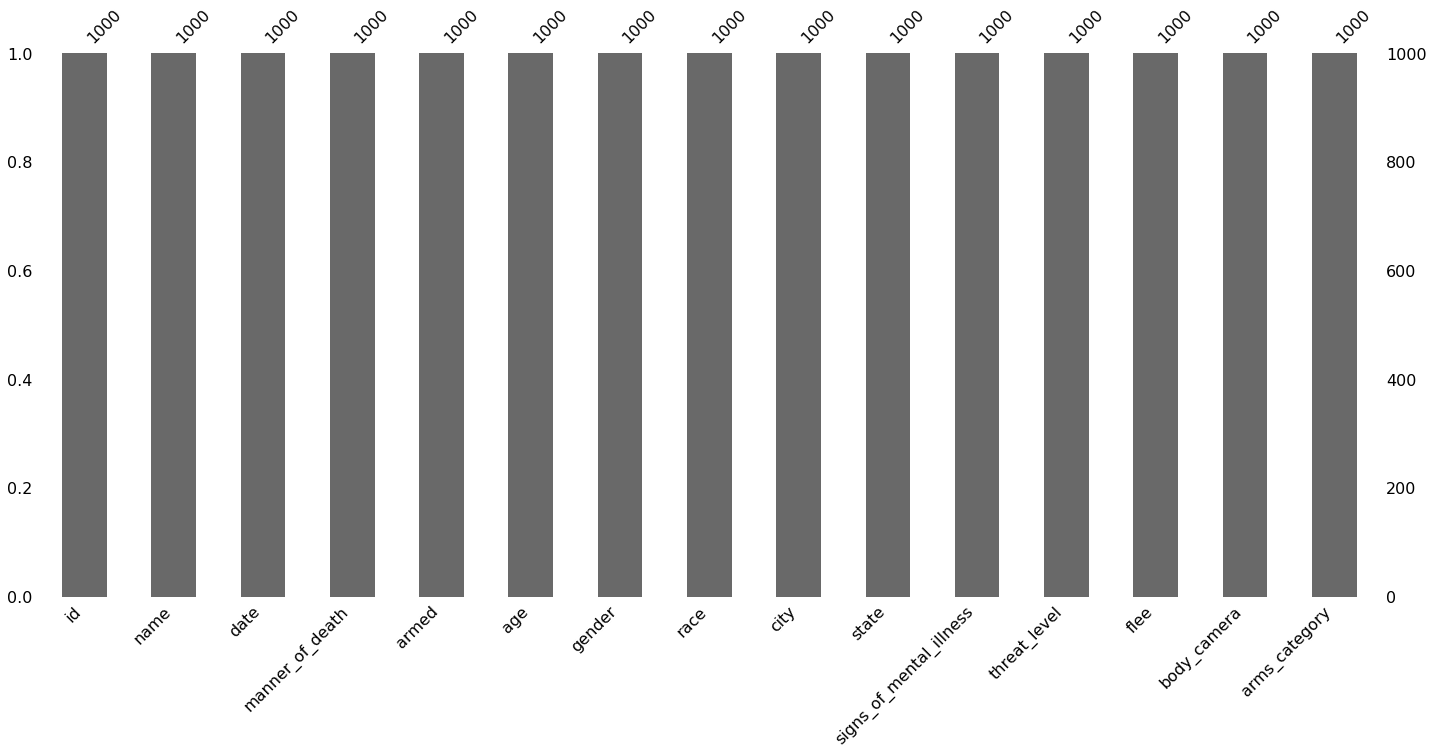

In [62]:
#The missingno module can be used to graphically show the nullity of the data using the bar command
msno.bar(data.sample(1000));

##### Since all the bars reach the peak, it means none of the columns have a null value hence reaffirming the output from the preceeding line of code. If there were null or missing values, the height of the various bars representing the columns will not reach the peak

## Checking if there are any duplicates in the dataset

In [63]:
# we know that column 'id' is unique, but what if we drop it?
data_dedupped = data.drop('id', axis=1).drop_duplicates()

# there were duplicate rows
# the above code helps drops the id column which is a unique identification for all the rows so that any duplicate row will be dropped
print(data.shape)
print(data_dedupped.shape)

(4895, 15)
(4895, 14)


##### The output of the above code shows that none of the rows are a duplicate. It shows that each one is distinct from the other one. If there were to be duplicates, then the first entry of the second tuple will be less than the first entry of the first tuple but since they are the same, it means that there are no duplicates in the rows of the dataset. This is quite tricky since there can be a situation where different policemen gave different reports for the same individual. To find out thing, we run a code with the name duplicates and check for each.

In [64]:
#This is to show the first 5 rows of the new table produced without the id 
data_dedupped.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [65]:
#This is to show the last 5 rows of the new table produced without the id 
data_dedupped.tail()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
4890,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns
4894,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,White,Lawrence,KS,False,attack,Car,False,Guns


In [66]:
#This is to check for the duplicates in the names column
names = data.name.value_counts(ascending=True, dropna = False)
names

Levonia Riggins         1
Kevin Lamont Judson     1
Dorgel Cisnero-Mesa     1
Jose Eduardo Flores     1
Donald S. Myers         1
                       ..
Michael Brown           2
Michael Johnson         2
Brandon Jones           2
Eric Harris             2
TK TK                  29
Name: name, Length: 4851, dtype: int64

In [67]:
#This is to show the number of duplicates in the data
names.tail(20)

Darrell J. Bruffy            1
Ryan Dean Burgess            1
Colton Calaway               1
Jeffrey Sims                 2
Robert Martinez              2
Robert Edwards               2
Benjamin Diaz                2
Jose Mendez                  2
Clayton Andrews              2
Michael Ferguson             2
Miguel Mercado Segura        2
Timothy Leroy Harrington     2
Joseph Santos                2
David Tylek Atkinson         2
Roderick McDaniel            2
Michael Brown                2
Michael Johnson              2
Brandon Jones                2
Eric Harris                  2
TK TK                       29
Name: name, dtype: int64

In [68]:
#This is to show whether the name Joseph Santos refers to different people or it is just a duplicate
data.loc[data['name'] == 'Joseph Santos']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
2684,3119,Joseph Santos,2017-11-09,shot,unknown,32.0,M,White,Providence,RI,False,attack,Car,True,Unknown
3348,3897,Joseph Santos,2018-07-28,shot,unarmed,44.0,M,Hispanic,South Whitehall Township,PA,False,undetermined,Not fleeing,False,Unarmed


In [69]:
#This is to show whether the name Robert Edwards refers to different people or it is just a duplicate
data.loc[data['name'] == 'Robert Edwards']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
30,54,Robert Edwards,2015-01-14,shot,gun,68.0,M,White,Lake Jackson,TX,False,attack,Not fleeing,False,Guns
2760,3222,Robert Edwards,2017-12-20,shot,toy weapon,33.0,M,White,Miami Township,OH,True,other,Not fleeing,False,Other unusual objects


In [70]:
#This is to show whether the name Michael Johnson refers to different people or it is just a duplicate
data.loc[data['name'] == 'Michael Johnson']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
1310,1526,Michael Johnson,2016-05-09,shot,gun,26.0,M,White,Chicago,IL,False,other,Foot,False,Guns
1362,1586,Michael Johnson,2016-06-01,shot,gun,21.0,M,Black,Newnan,GA,False,attack,Foot,True,Guns


In [71]:
#This is to show whether the name Benjamin Diaz refers to different people or it is just a duplicate
data.loc[data['name'] == 'Benjamin Diaz']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
4350,5150,Benjamin Diaz,2019-11-01,shot,sharp object,22.0,M,Hispanic,Alamogordo,NM,False,attack,Car,False,Sharp objects
4354,5191,Benjamin Diaz,2019-11-01,shot,box cutter,22.0,M,Hispanic,Alamogordo,NM,False,attack,Not fleeing,False,Sharp objects


In [72]:
#This is to show whether the name David Tylek Atkinson refers to different people or it is just a duplicate
data.loc[data['name'] == 'David Tylek Atkinson']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
4829,5835,David Tylek Atkinson,2020-05-13,shot,gun,24.0,M,Black,Raleigh,NC,False,attack,Foot,False,Guns
4830,5889,David Tylek Atkinson,2020-05-13,shot,gun,24.0,M,Black,Raleigh,NC,False,attack,Foot,True,Guns


In [73]:
#This is to show whether the name Timothy Leroy Harrington refers to different people or it is just a duplicate
data.loc[data['name'] == 'Timothy Leroy Harrington']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
4632,5537,Timothy Leroy Harrington,2020-02-14,shot,gun,58.0,M,White,Polkton,NC,False,other,Car,False,Guns
4635,5548,Timothy Leroy Harrington,2020-02-14,shot,gun,58.0,M,White,Polkton,NC,False,attack,Car,False,Guns


In [74]:
#This is to show whether the name Robert Martinez refers to different people or it is just a duplicate
data.loc[data['name'] == 'Robert Martinez']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
2818,3309,Robert Martinez,2018-01-15,shot,gun,42.0,M,Hispanic,Eugene,OR,False,other,Not fleeing,False,Guns
3744,4434,Robert Martinez,2019-02-01,shot,vehicle,45.0,M,Hispanic,Denver,CO,False,attack,Car,False,Vehicles


In [75]:
#This is to show whether the name Jose Mendez refers to different people or it is just a duplicate
data.loc[data['name'] == 'Jose Mendez']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
1060,1240,Jose Mendez,2016-02-06,shot,gun,16.0,M,Hispanic,Los Angeles,CA,False,attack,Car,True,Guns
4183,4934,Jose Mendez,2019-08-09,shot,gun and vehicle,37.0,M,Hispanic,Kansas City,MO,False,attack,Foot,False,Multiple


In [76]:
#This is to show whether the name Brandon Jones refers to different people or it is just a duplicate
data.loc[data['name'] == 'Brandon Jones']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
205,229,Brandon Jones,2015-03-19,shot,unarmed,18.0,M,Black,Cleveland,OH,False,attack,Not fleeing,False,Unarmed
1724,1991,Brandon Jones,2016-10-25,shot,toy weapon,25.0,M,White,Elkton,MD,True,attack,Not fleeing,False,Other unusual objects


In [77]:
#This is to show whether the name Michael Ferguson refers to different people or it is just a duplicate
data.loc[data['name'] == 'Michael Ferguson']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
1595,1841,Michael Ferguson,2016-08-31,shot,gun,21.0,M,White,Denver,CO,False,attack,Foot,False,Guns
4800,5769,Michael Ferguson,2020-05-03,shot,gun,54.0,M,White,Fort Lauderdale,FL,False,other,Not fleeing,False,Guns


In [78]:
#This is to show whether the name Eric Harris refers to different people or it is just a duplicate
data.loc[data['name'] == 'Eric Harris']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
246,291,Eric Harris,2015-04-02,shot,unarmed,44.0,M,Black,Tulsa,OK,False,other,Not fleeing,False,Unarmed
1065,1252,Eric Harris,2016-02-08,shot,unknown,22.0,M,Black,New Orleans,LA,False,other,Car,False,Unknown


In [79]:
#This is to show whether the name Clayton Andrew refers to different people or it is just a duplicate
data.loc[data['name'] == 'Clayton Andrews']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
4332,5128,Clayton Andrews,2019-10-25,shot,gun,40.0,M,White,Kansas,OK,False,attack,Not fleeing,False,Guns
4335,5135,Clayton Andrews,2019-10-26,shot,gun,40.0,M,White,Creek County,OK,True,attack,Car,False,Guns


In [80]:
#This is to show whether the name Jeffrey Sims refers to different people or it is just a duplicate
data.loc[data['name'] == 'Jeffrey Sims']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
1321,1538,Jeffrey Sims,2016-05-14,shot,gun,59.0,M,White,Osteen,FL,False,attack,Not fleeing,False,Guns
3450,4045,Jeffrey Sims,2018-09-18,shot,knife,37.0,M,White,Marysville,WA,True,attack,Not fleeing,False,Sharp objects


In [81]:
#This is to show whether the name Miguel Mercado Segura refers to different people or it is just a duplicate
data.loc[data['name'] == 'Miguel Mercado Segura']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
4568,5389,Miguel Mercado Segura,2020-01-20,shot,gun,31.0,M,Hispanic,Fountain Valley,CA,False,other,Foot,False,Guns
4574,5515,Miguel Mercado Segura,2020-01-21,shot,gun,31.0,M,Hispanic,Fountain Valley,CA,False,other,Foot,False,Guns


In [82]:
#This is to show whether the name Michael Brown refers to different people or it is just a duplicate
data.loc[data['name'] == 'Michael Brown']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
1044,1225,Michael Brown,2016-01-31,shot and Tasered,unarmed,25.0,M,White,Saginaw,TX,False,attack,Not fleeing,False,Unarmed
2306,2671,Michael Brown,2017-06-15,shot,gun,40.0,M,White,Newton,NH,False,undetermined,Car,False,Guns


In [83]:
#This is to show whether the name Roderick McDaniel refers to different people or it is just a duplicate
data.loc[data['name'] == 'Roderick McDaniel']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
3576,4195,Roderick McDaniel,2018-11-19,shot,gun,33.0,M,Black,Magnolia,AR,False,attack,Not fleeing,False,Guns
3577,4237,Roderick McDaniel,2018-11-20,shot,vehicle,33.0,M,Black,Magnolia,AR,False,attack,Not fleeing,False,Vehicles


In [84]:
#This is to show whether the name TK TK refers to different people or it is just a duplicate
#From our research, we found at TK means to come hence this is not a particular name
data.loc[data['name'] == 'TK TK']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
1600,1848,TK TK,2016-09-01,shot and Tasered,pipe,37.117931,M,Hispanic,Huntington Park,CA,False,other,Not fleeing,False,Blunt instruments
1959,2278,TK TK,2017-01-31,shot and Tasered,knife,37.117931,M,Black,Hollywood,CA,True,attack,Not fleeing,False,Sharp objects
2148,2494,TK TK,2017-04-10,shot,gun,39.000000,M,Black,Houston,TX,False,other,Foot,True,Guns
2220,2573,TK TK,2017-05-11,shot,gun,37.117931,M,Hispanic,Arlington,TX,False,attack,Not fleeing,False,Guns
2252,2606,TK TK,2017-05-24,shot,gun,37.117931,M,Hispanic,Los Angeles,CA,False,attack,Not fleeing,False,Guns
2368,2752,TK TK,2017-07-07,shot,unknown,16.000000,M,White,Huntsville,AL,False,attack,Car,False,Unknown
2448,2837,TK TK,2017-08-04,shot,gun,47.000000,M,Black,San Diego,CA,False,other,Not fleeing,False,Guns
2561,2979,TK TK,2017-09-22,shot,unknown,37.117931,M,White,Denver,CO,False,other,Not fleeing,False,Unknown
2676,3112,TK TK,2017-11-06,shot,gun,48.000000,M,White,Barstow,CA,False,attack,Car,False,Guns
2692,3131,TK TK,2017-11-10,shot,unknown,37.117931,M,Black,Hinds County,MS,False,other,Not fleeing,False,Unknown


### Summary Of The Duplicates Check

##### The above analysis brings to light that the repetition of the names doesn't mean they are the same since there can be the same name for different people. This is due to the fact that some of the people with the same names have different ages and hence are different people. Also some died in different states. For the other groups of people with same name and age, after dropping the id and name columns it will come to light that they are actually different. This is made evident in names like Roderick McDaniel where the armed and arms_category column have different values. This means that the report given by the policemen were different and can be they were trying to lie and since we do not have enough reason to drop this, we include it for further analysis.

## Checking For Outliers In The Dataset

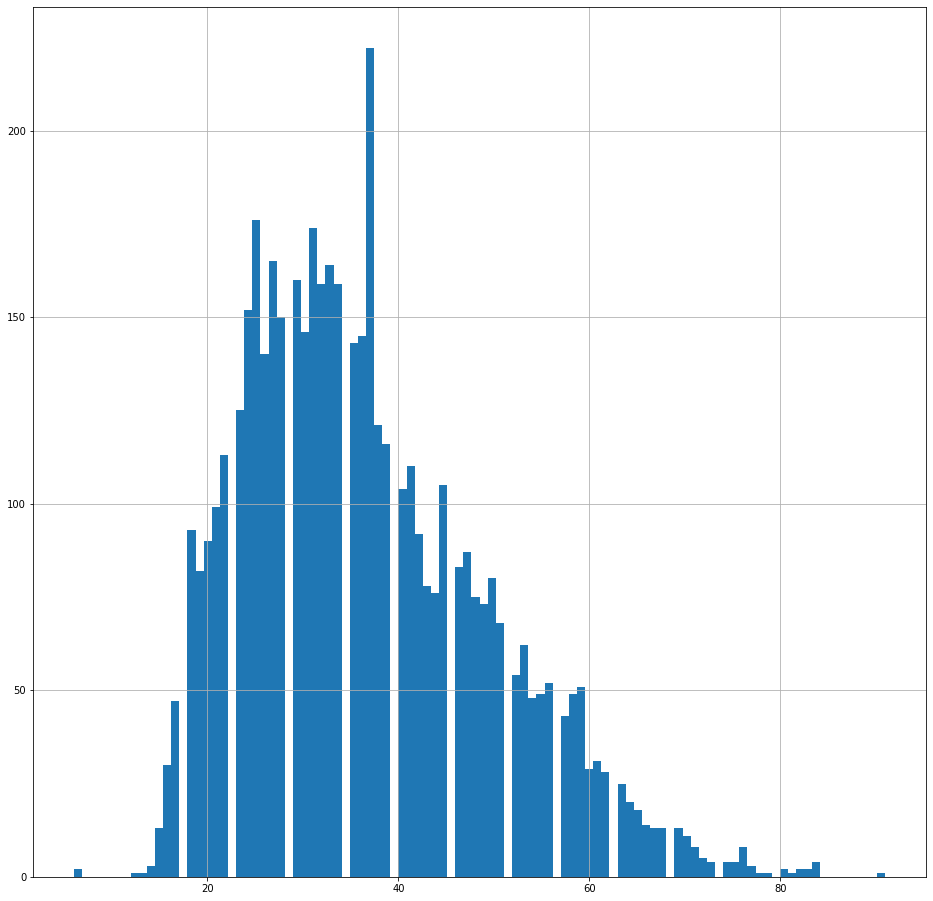

In [86]:
# histogram of age to show how the values are arranged
data['age'].hist(bins=100, figsize=(16,16));

In [87]:
#This is to describe the age column by showing the various percentiles, max, min values etc
data['age'].describe()

count    4895.000000
mean       36.549750
std        12.694348
min         6.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64

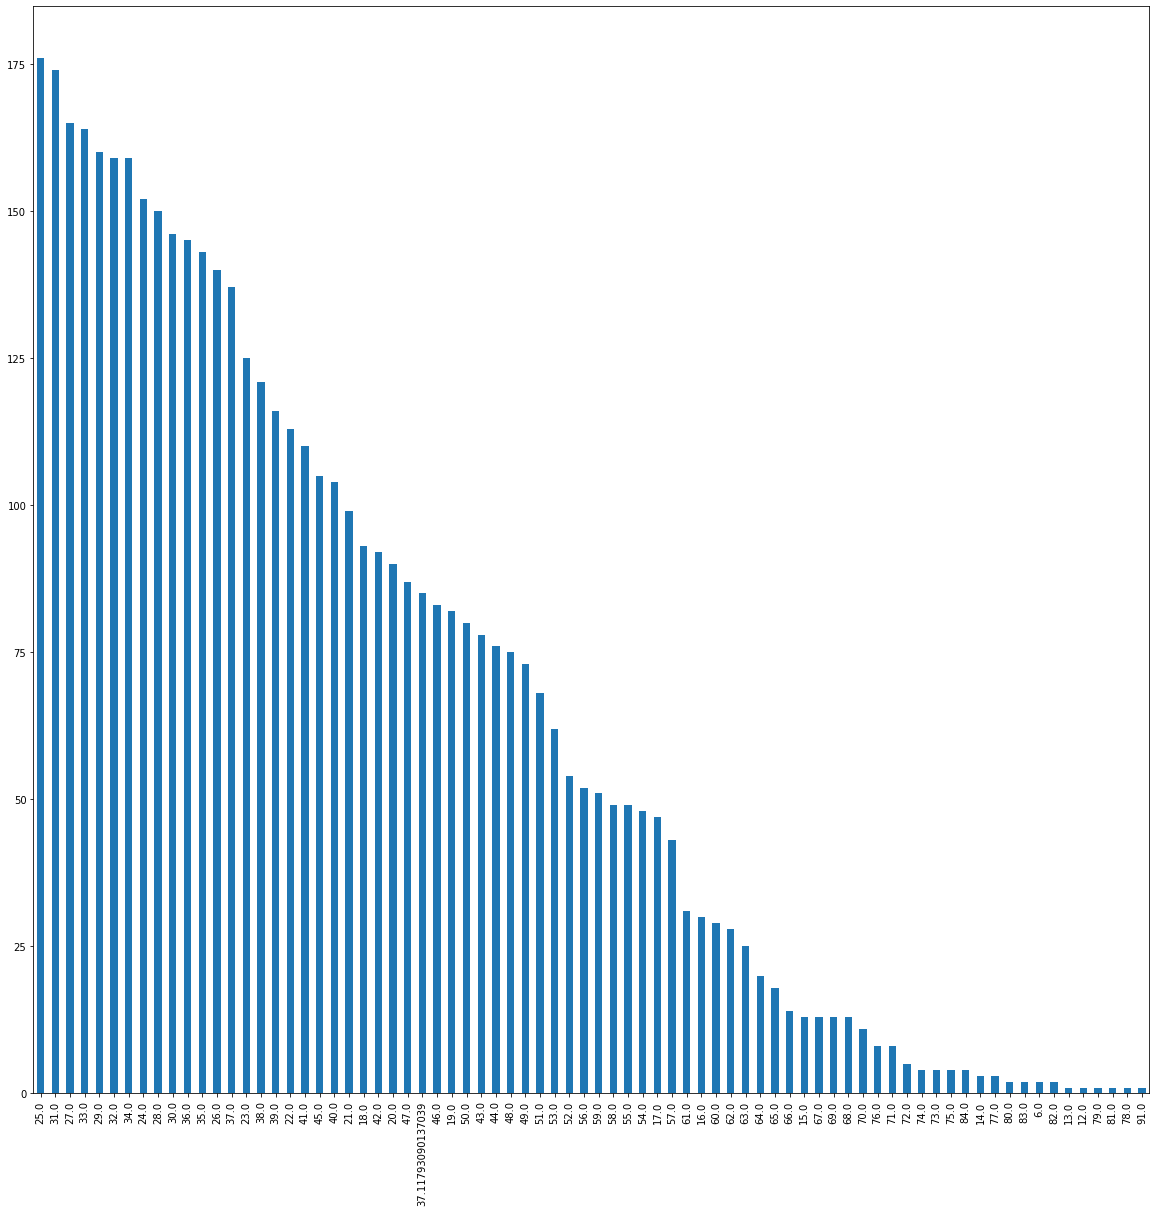

In [88]:
data['age'].value_counts().plot.bar(figsize=(20,20));

##### From the output of the above code, it is realized that the ages are in float and hence there is an irregular age value of 37.11793090137039. To clean this, we will turn the whole age column into an integer so that the effect of this value will not affect our analysis

In [89]:
#This code is to convert the age column into an integer in order to reduce the effect of 37.11793090137039 in further analysis
data['age']=data['age'].astype('int64')

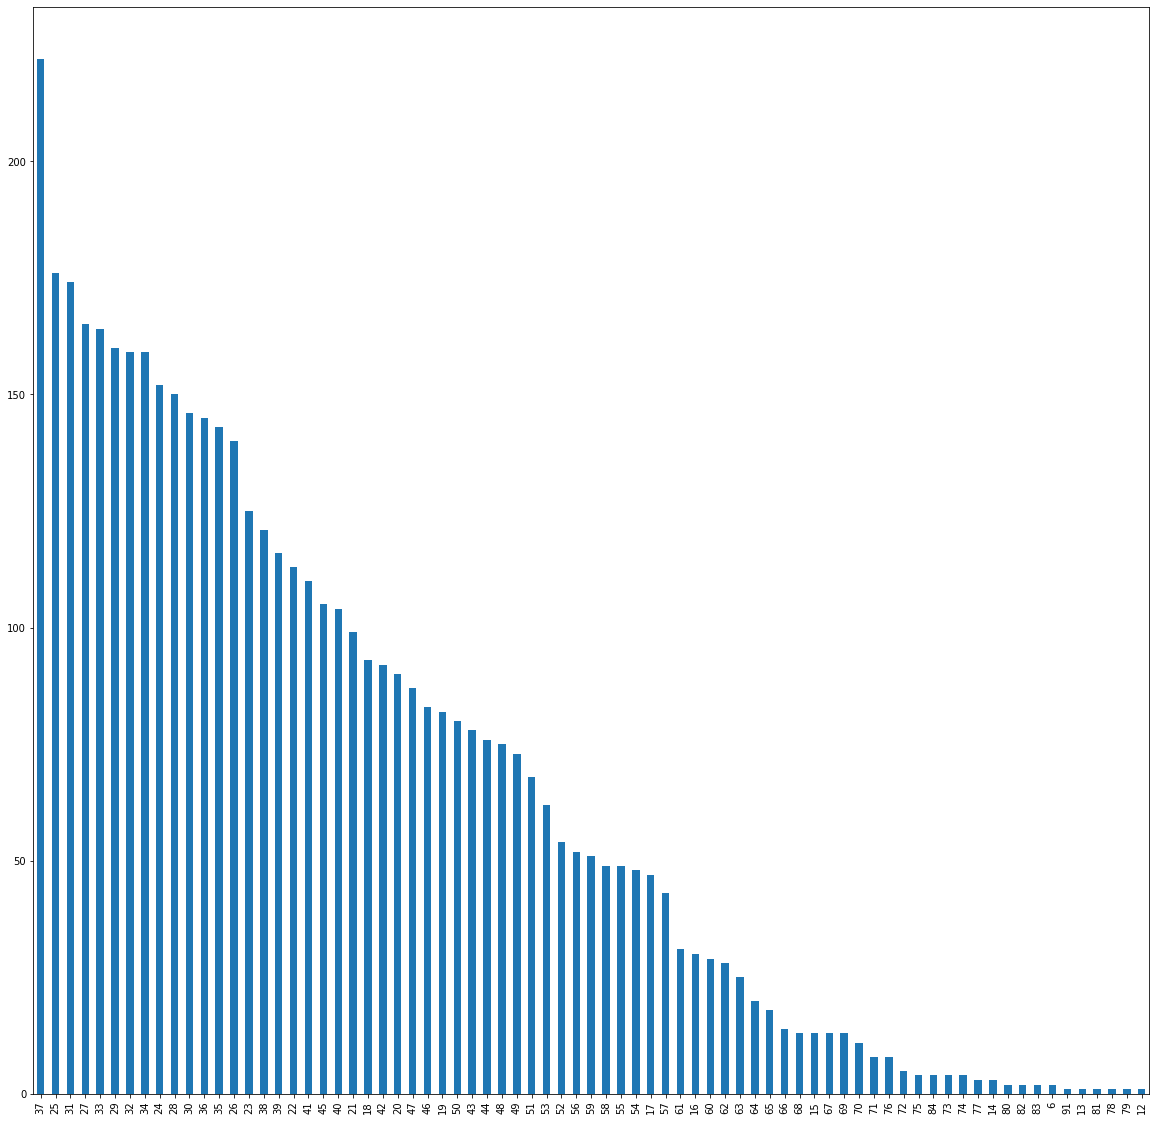

In [90]:
#This is to plot the age column again to see if actually all the values of the ages are now integers
data['age'].value_counts().plot.bar(figsize=(20,20));

##### From the above, it can be noticed that the float value of  37.11793090137039 has been converted to 37 and added to the 37 values for better analysis of the data

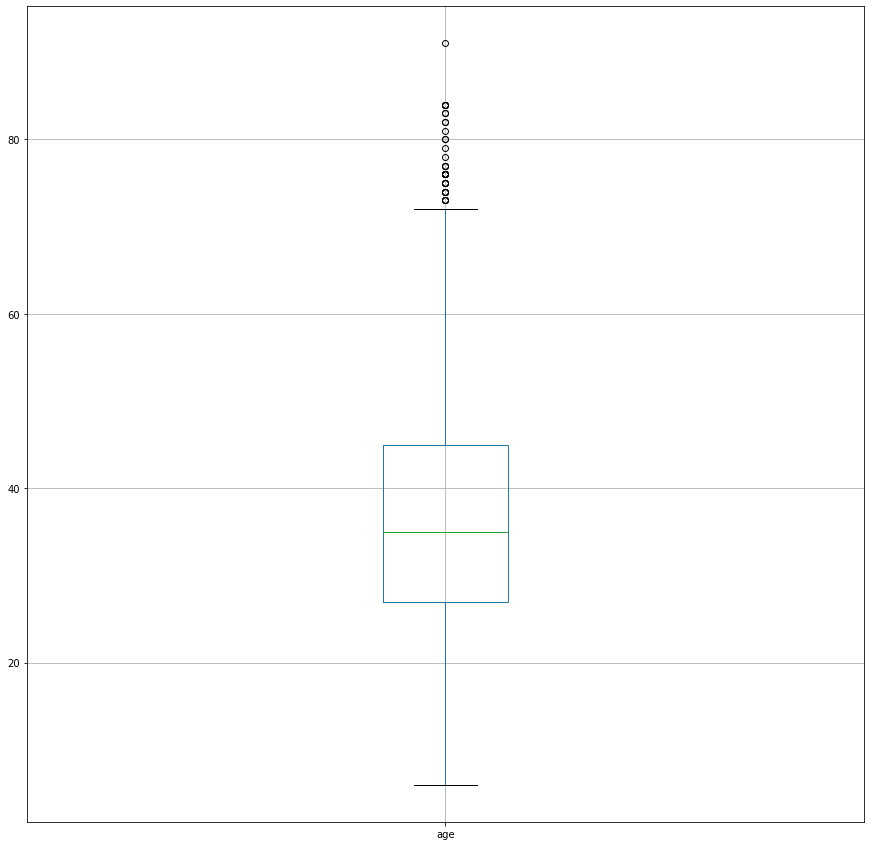

In [91]:
#To make a boxplot to show how the data is distributed
data.boxplot(column=['age'], figsize=(15, 15));
#This boxplot shows that quite a number of ages are outliers as compared to the general distribution of the victims' ages

## Checking For Less Important Data In The DataSet

In [92]:
#This code is used to calculate the columns with more than 90% of the rows having the same values
#This is done to give an overview of the columns that should be given higher priority in the analysis of the data
num_rows = len(data.index)
low_information_cols = [] 

for col in data.columns:
    counts = data[col].value_counts(dropna=False)
    top_pct = (counts/num_rows).iloc[0]
    
    if top_pct > 0.90:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(counts)
        print()

manner_of_death: 94.93361%
shot                4647
shot and Tasered     248
Name: manner_of_death, dtype: int64

gender: 95.46476%
M    4673
F     222
Name: gender, dtype: int64



## Checking For Inconsistent Data In The DataSet

##### Inconsistent Data usually come from differences where there is capital letters and small letters representing the same thing like name. For examples James and james meaning the same in a dataset but will be seen to be different because of capitalizations. To get this right, all the columns with string inputs will be converted to smaller case and see if the original values we had after running the describe method gives the same values with the lower case.

In [93]:
#This converts the name column to lower case and count the various values
data['name'].str.lower().value_counts(ascending = True, dropna=False)

jeremy dean duncan           1
miguel barraza-lugo          1
eric carter                  1
austin dean heights          1
luis morales-camacho         1
                            ..
brandon jones                2
timothy leroy harrington     2
jose mendez                  2
david tylek atkinson         2
tk tk                       29
Name: name, Length: 4851, dtype: int64

In [94]:
#This converts the armed column to lower case and count the various values
data['armed'].str.lower().value_counts(ascending = True, dropna=False)

grenade                                1
nail gun                               1
bow and arrow                          1
baseball bat and fireplace poker       1
machete and gun                        1
                                    ... 
toy weapon                           171
unarmed                              348
unknown                              418
knife                                708
gun                                 2755
Name: armed, Length: 89, dtype: int64

In [95]:
#This converts the manner of death column to lower case and count the various values
data['manner_of_death'].str.lower().value_counts(ascending = True, dropna=False)

shot and tasered     248
shot                4647
Name: manner_of_death, dtype: int64

In [96]:
#This converts the arms category column to lower case and count the various values
data['arms_category'].str.lower().value_counts(ascending = True, dropna=False)

hand tools                  1
explosives                  4
electrical devices         24
piercing objects           29
multiple                   54
vehicles                  121
blunt instruments         122
other unusual objects     192
unarmed                   348
unknown                   418
sharp objects             818
guns                     2764
Name: arms_category, dtype: int64

In [97]:
#This converts the city column to lower case and count the various values
data['city'].str.lower().value_counts(ascending = True, dropna=False)

larimer county       1
aspers               1
lake havasu city     1
glen burnie          1
la quinta            1
                    ..
san antonio         40
las vegas           41
houston             51
phoenix             66
los angeles         78
Name: city, Length: 2287, dtype: int64

In [98]:
#This converts the state column to lower case and count the various values
data['state'].value_counts(ascending = True, dropna=False)

RI      4
VT      8
DE     10
ND     11
NH     12
DC     13
WY     13
SD     14
CT     20
ME     21
NE     24
HI     29
MT     29
IA     31
MA     33
AK     36
ID     37
WV     46
KS     49
UT     58
NJ     60
MN     60
MS     61
MI     71
AR     73
OR     76
MD     77
SC     80
NV     85
KY     87
WI     88
NY     90
IN     91
VA     92
NM     93
PA     95
AL     95
IL     99
LA    102
MO    124
TN    125
WA    126
OH    146
NC    148
OK    151
GA    161
CO    168
AZ    222
FL    324
TX    426
CA    701
Name: state, dtype: int64

In [99]:
#This converts the race column to lower case and count the various values
data['race'].str.lower().value_counts(ascending = True, dropna=False)

other         48
native        78
asian         93
hispanic     902
black       1298
white       2476
Name: race, dtype: int64

In [100]:
#This converts the threat column to lower case and count the various values
data['threat_level'].str.lower().value_counts(ascending = True, dropna=False)

undetermined     207
other           1528
attack          3160
Name: threat_level, dtype: int64

In [101]:
#This converts the flee column to lower case and count the various values
data['flee'].str.lower().value_counts(ascending = True, dropna=False)

other           360
foot            642
car             820
not fleeing    3073
Name: flee, dtype: int64

In [102]:
#Summary Of The Exploration For Inconsistent Data
#From the above, the various counts after the columns with string values were converted to lowercase 
#and counted gave the same #counts as they were in their normal cases. This shows that the data is consistent

# 3. Analysis Of Data ( Visualizations )
### This is made up of the various diagrams and charts showing the relationships between the variables

## (a) Visualizations Of Columns

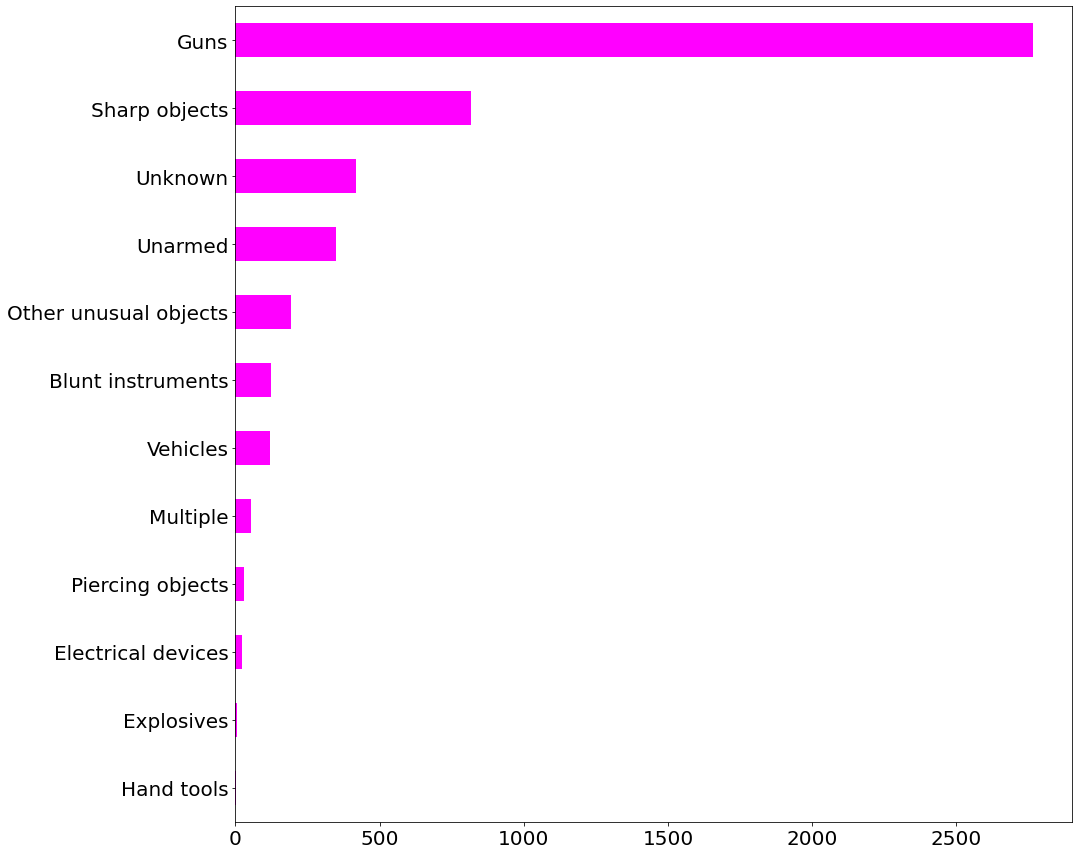

In [103]:
#This is to show a graph of the various counts of values of the arms category
data['arms_category'].value_counts(ascending=True).plot(kind='barh', figsize=(15,15), colormap='spring', grid =False, fontsize=20);

##### The output above shows that, the arms category usually possessed by the shot victims is guns with a count rate of more than 2.5K, followed by sharp objects, then unknown with the least being hand tools.

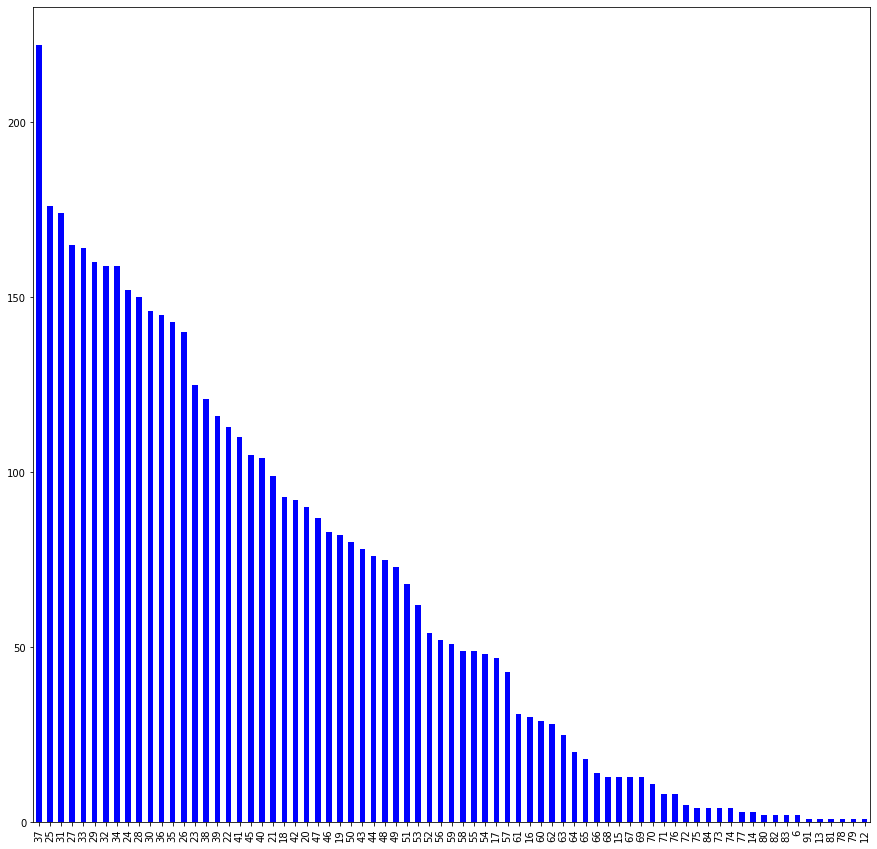

In [104]:
#This is to show a graph of the various counts of values of the age column
data['age']=data['age'].astype('int64')
data['age'].value_counts().plot(kind='bar', figsize=(15,15), colormap='brg',fontsize=10, grid=False);

##### The above output shows that most people who are killed are within the ages of 20 to 60. People less than 20 do not have much count.

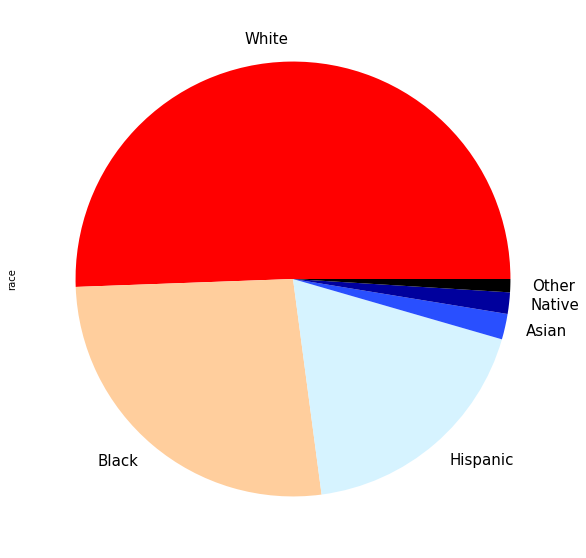

In [105]:
#This is to show a graph of the various counts of values of the race column
data['race'].value_counts().plot(kind='pie', figsize=(10,10), colormap='flag',fontsize=15, grid=True);

##### The above output shows that actually the US Police Department do not kill mostly Blacks as we thought but rather Whites

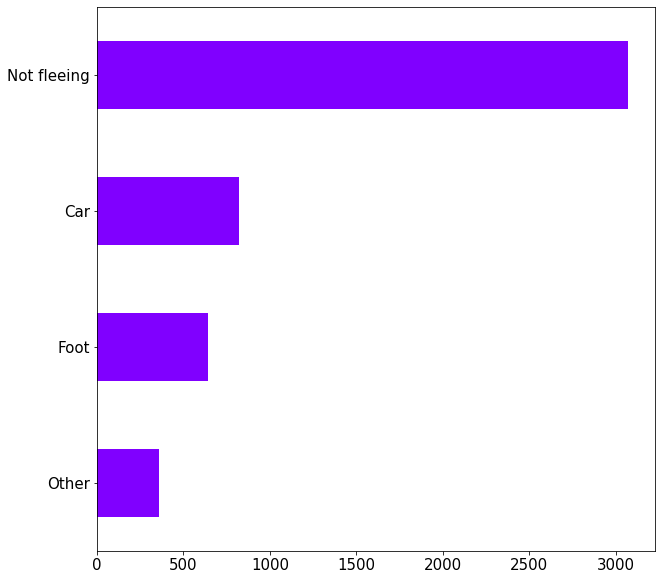

In [106]:
#This is to show a graph of the various counts of values of the flee column
data['flee'].value_counts(ascending=True).plot(kind='barh', figsize=(10,10), colormap='rainbow',fontsize=15, grid=False);

##### The above output shows that the US Police Department usually shoot people who are not fleeing. This shows that those who try to turn in to the police are usually shot and those who try to flee for their lives using various means are saved.

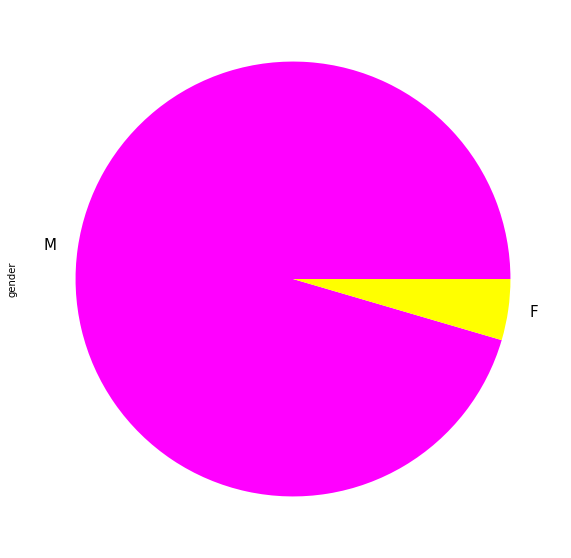

In [107]:
#This is to show a graph of the various counts of values of the gender column
data['gender'].value_counts().plot(kind='pie', figsize=(10,10), colormap='spring',fontsize=15, grid=True);

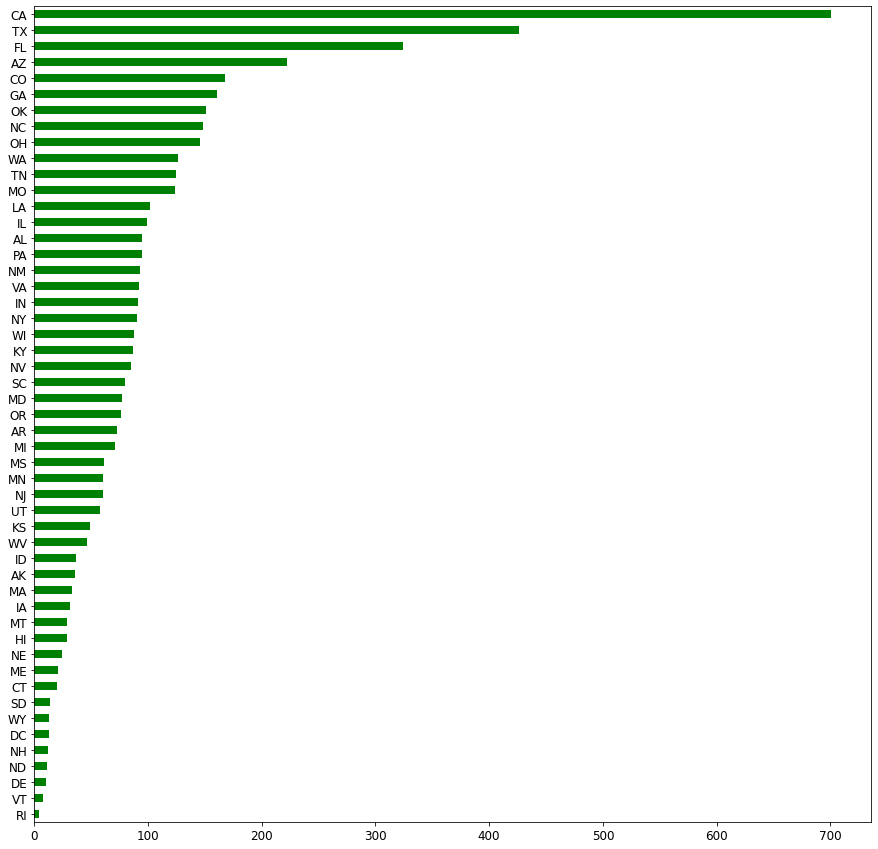

In [108]:
#This is to show a graph of the various counts of values of the state column
data['state'].value_counts(ascending=True).plot(kind='barh', figsize=(15,15), colormap='ocean',fontsize=12, grid=False);

##### From the output above, the state of California has the highest shooting cases with the state of Rhode Island having the least shooting cases. The state of California has a count of more than 700

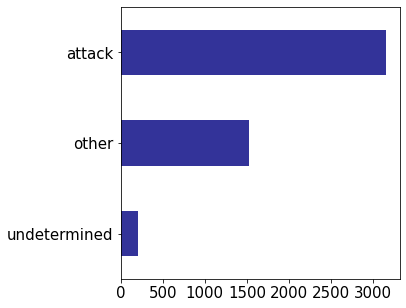

In [109]:
#This is to show a graph of the various counts of values of the threat level column
data['threat_level'].value_counts(ascending=True).plot(kind='barh', figsize=(5,5), colormap='terrain',fontsize=15, grid=False);

##### The above horizontal graph shows clearly that, the number of people that tried to attack were shot a lot than others. The total number of who tried to attack and were shot goes over 3000 showing that a significant proportion of the shooting cases find those who try to attack as victims

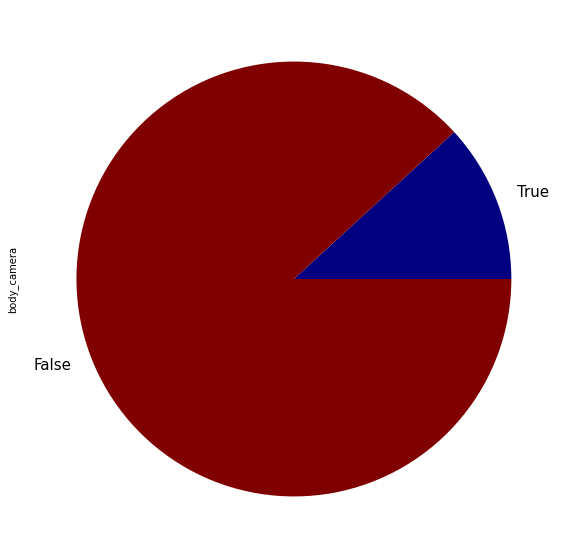

In [110]:
#This is to show a graph of the various counts of values of the body camera column
data['body_camera'].value_counts(ascending=True).plot(kind='pie', figsize=(10,10), colormap='jet',fontsize=15, grid=True);

##### From the above diagram, the number of US Police personnel that shot people without their cameras on is more than 75% of the total number of people shot. This shows that some US Police personnel try to keep the incident clean.

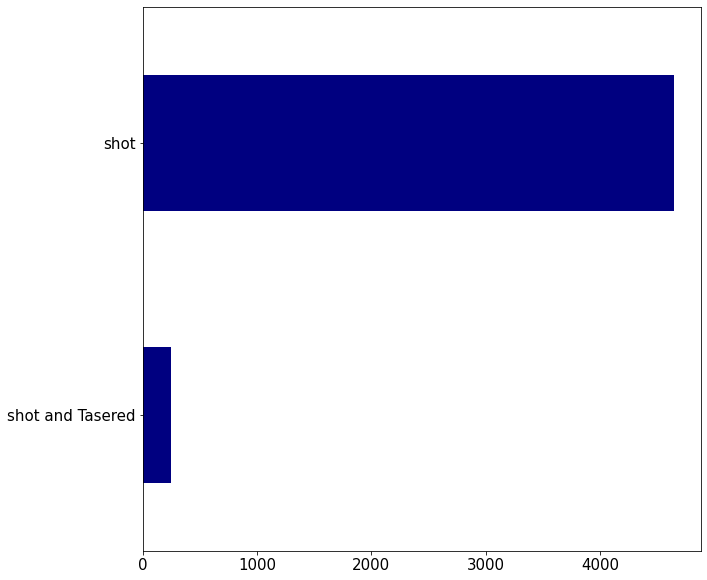

In [143]:
#This is to show a graph of the various counts of values of the city column
data['manner_of_death'].value_counts(ascending=True).plot(kind='barh', figsize=(10,10), colormap='jet',fontsize=15, grid=False);

##### The above shows that the US Police shoot the victims more than shooting and tasering.

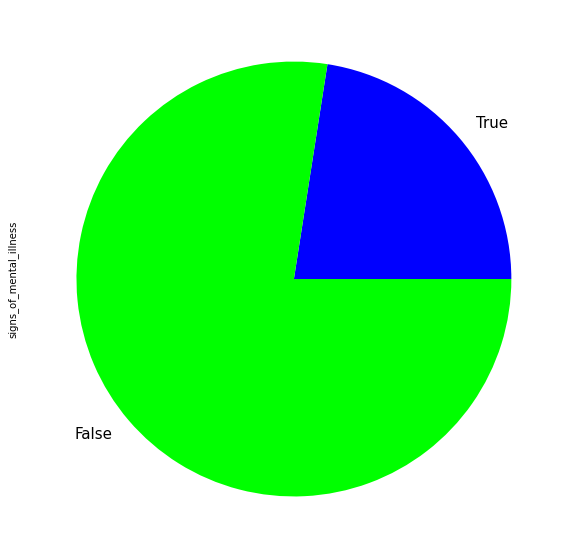

In [112]:
#This is to show a graph of the various counts of values of the armed column
data['signs_of_mental_illness'].value_counts(ascending=True).plot(kind='pie', figsize=(10,10), colormap='brg',fontsize=15, grid=True);

##### The above diagram showing that people without mental illness are shot more by the police than people with mental illness.

In [121]:
#This code is to take only the year into consideration
year = pd.DatetimeIndex(data['date']).year
year

Int64Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', name='date', length=4895)

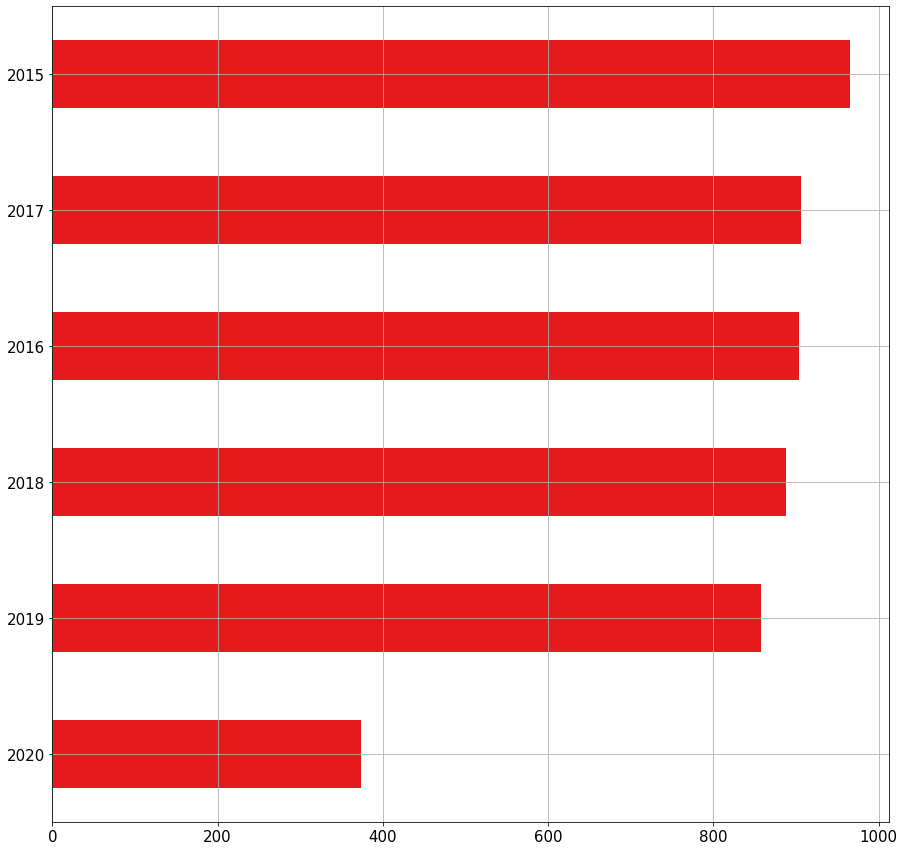

In [122]:
#This is to show a graph of the various counts of values of the armed column
year.value_counts(ascending=True).plot(kind='barh', figsize=(15,15), colormap='Set1',fontsize=15, grid=True);

##### This shows that the year 2015 recorded the heighest number of deaths
##### 2020 has the least number of deaths possible because the year has possibly not ended.

## (b) Multivariate Visualizations Of Some Columns

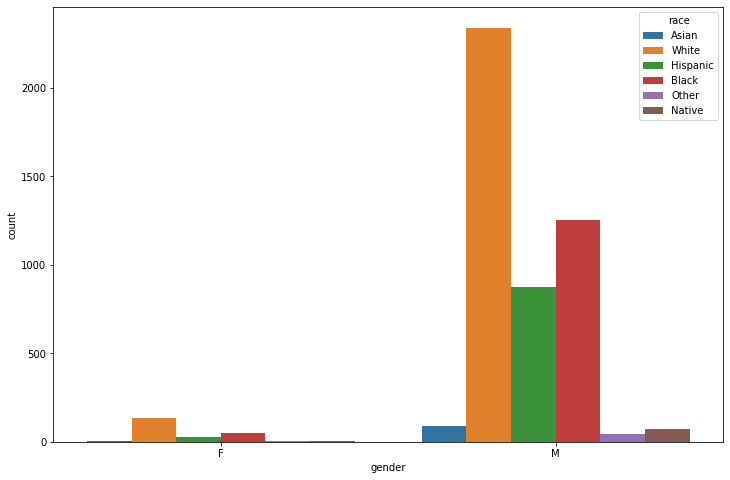

In [113]:
#This shows the relationship between gender and race according to the dataset
plt.figure(figsize=(12,8))
sns.countplot(x='gender', data=data, hue='race', order=['F', 'M']);

##### The above graph shows the relationship between the number of males and females that make up the various race. This shows evidently that the number of white males and white females shot is very high. The number of black males and females shot come second.

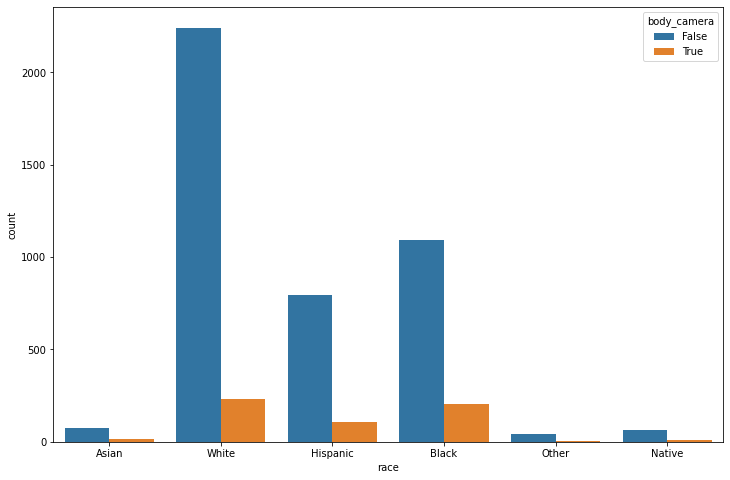

In [114]:
#This shows the relationship between race and body camera according to the dataset
plt.figure(figsize=(12,8))
sns.countplot(x='race', data=data, hue='body_camera');

##### The above graph shows the relationship between race and body camera. It can be seen that usually whites are shot by the police with their body cameras on.

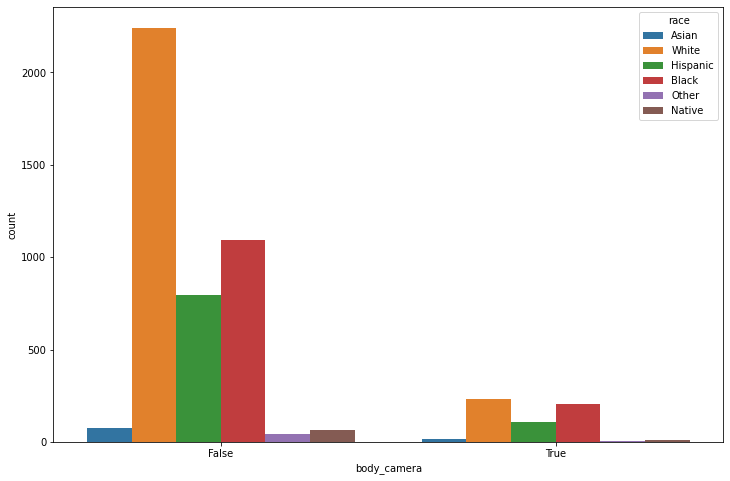

In [115]:
#This is just a reverse of the race and body camera
plt.figure(figsize=(12,8))
sns.countplot(x='body_camera', data=data, hue='race');

##### The above graph shows that in general  a lot of people from all races are usually shot by the police while their body cameras are off.

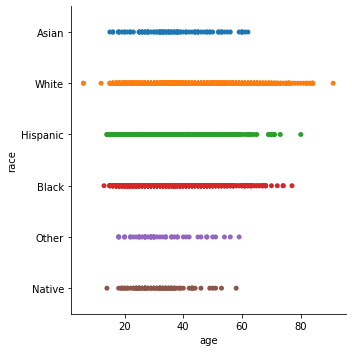

In [229]:
#This shows the relationship between age and race.
sns.catplot(x="age", y="race", jitter=False, data=data);

##### The above diagram shows the relationship between the age and the race columns of the dataset. From the graph, we can infer that irrespective of race, usually people between the ages of 20 and 45 are shot.

<Figure size 864x576 with 0 Axes>

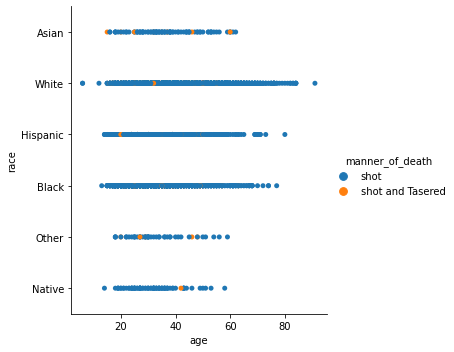

In [117]:
#This shows the relationship between age, race and manner of death.
plt.figure(figsize=(12,8));
sns.catplot(x="age", y="race", hue='manner_of_death', jitter=False, data=data);

##### The output above shows that, more whites are shot than black being shot. 

In [118]:
data.loc[(data['race'] == 'Black') & (data['manner_of_death'] == 'shot')].describe()

,id,age
count,1229.000000,1229.000000
mean,2957.481692,32.475183
std,1713.228335,11.311855
min,17.000000,13.000000
25%,1470.000000,24.000000
50%,2930.000000,31.000000
75%,4475.000000,38.000000
max,5925.000000,77.000000


In [119]:
data.loc[(data['race'] == 'White') & (data['manner_of_death'] == 'shot')].describe()

,id,age
count,2360.000000,2360.000000
mean,2900.598729,39.987288
std,1684.471346,13.318634
min,4.000000,6.000000
25%,1443.500000,30.000000
50%,2857.500000,38.000000
75%,4307.500000,49.000000
max,5924.000000,91.000000


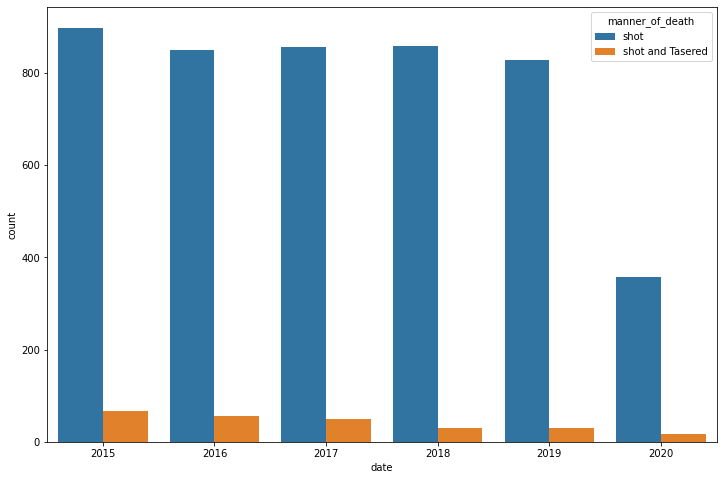

In [123]:
#This shows the relationship between year and manner of death.
plt.figure(figsize=(12,8))
sns.countplot(x=year, hue='manner_of_death', data=data);

In [124]:
#This is to bring US population as of 2019 for further analysis to answer our research questions
population_data = pd.read_csv('QuickFacts Aug-08-2020.csv')

In [125]:
#This shows the first 5 rows of the data
population_data.head()

,Fact,Fact Note,United States,Value Note for United States
0,"Population estimates, July 1, 2019, (V2019)",NaN,"328,239,523",NaN
1,"Population estimates base, April 1, 2010, (V2...",NaN,"308,758,105",NaN
2,"Population, percent change - April 1, 2010 (es...",NaN,6.3%,NaN
3,"Population, Census, April 1, 2010",NaN,"308,745,538",NaN
4,"Persons under 5 years, percent",NaN,6.0%,NaN


In [126]:
#This shows the last 5 rows of the data
population_data.tail()

,Fact,Fact Note,United States,Value Note for United States
78,N,Data for this geographic area cannot be displa...,NaN,NaN
79,NaN,Not available,NaN,NaN
80,S,Suppressed; does not meet publication standards,NaN,NaN
81,X,Not applicable,NaN,NaN
82,Z,Value greater than zero but less than half uni...,NaN,NaN


In [127]:
#This gives the percentage of Blacks in the US population as of 2019
population_data.loc[population_data['Fact'] == 'Black or African American alone, percent']

,Fact,Fact Note,United States,Value Note for United States
9,"Black or African American alone, percent",(a),13.4%,NaN


In [128]:
#This gives the percentage of Hispanic in the US population as of 2019
population_data.loc[population_data['Fact'] == 'Hispanic or Latino, percent']

,Fact,Fact Note,United States,Value Note for United States
14,"Hispanic or Latino, percent",(b),18.5%,NaN


In [129]:
##This gives the percentage of White in the US population as of 2019
population_data.loc[population_data['Fact'] == 'White alone, percent']

,Fact,Fact Note,United States,Value Note for United States
8,"White alone, percent",NaN,76.3%,NaN


In [130]:
##This gives the total population in the US population as of 2019
population_data.loc[population_data['Fact'] == 'Population estimates, July 1, 2019,  (V2019)']

,Fact,Fact Note,United States,Value Note for United States
0,"Population estimates, July 1, 2019, (V2019)",NaN,"328,239,523",NaN


In [131]:
#This calculates the comparison between the number of shootings and the total number of USA population
total_population_of_USA = 328239523
total_number_of_shootings = 4895
ratio = total_population_of_USA / total_number_of_shootings
percentage_of_deaths = (total_number_of_shootings / total_population_of_USA ) * 100
print(ratio)
print(percentage_of_deaths)

67056.08232890705
0.0014912890304194112


##### From the above output, it can be seen that the number of shootings compared to the total number of the USA population is 0.0015 percent. This means the total number of deaths compared to the overall population of USA is smaller and hence this cannot be considered a massacre yet.

In [132]:
#This is to reveal the number of blacks that were armed and shot by the police
data.loc[(data['race'] == 'Black') & ~(data['armed'] == 'unarmed') & (data['manner_of_death'] == 'shot')]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47,M,Black,Knoxville,PA,False,attack,Not fleeing,False,Other unusual objects
11,21,Ron Sneed,2015-01-07,shot,gun,31,M,Black,Freeport,TX,False,attack,Not fleeing,False,Guns
12,22,Hashim Hanif Ibn Abdul-Rasheed,2015-01-07,shot,knife,41,M,Black,Columbus,OH,True,other,Not fleeing,False,Sharp objects
14,27,Omarr Julian Maximillian Jackson,2015-01-07,shot,gun,37,M,Black,New Orleans,LA,False,attack,Foot,True,Guns
26,49,Marcus Golden,2015-01-14,shot,unknown,24,M,Black,St. Paul,MN,False,attack,Not fleeing,False,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,5899,Kamal Flowers,2020-06-06,shot,gun,24,M,Black,New Rochelle,NY,False,attack,Foot,False,Guns
4886,5911,Lewis Ruffin,2020-06-09,shot,gun,38,M,Black,Orlando,FL,False,attack,Other,False,Guns
4889,5915,Michael Thomas,2020-06-11,shot,unknown,62,M,Black,Lancaster,CA,False,undetermined,Not fleeing,False,Unknown
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices


In [133]:
#This is to reveal the number of whites that were armed and shot by the police
data.loc[(data['race'] == 'White') & ~(data['armed'] == 'unarmed') & (data['manner_of_death'] == 'shot')]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18,M,White,Guthrie,OK,False,attack,Not fleeing,False,Guns
7,15,Brock Nichols,2015-01-06,shot,gun,35,M,White,Assaria,KS,False,attack,Not fleeing,False,Guns
13,25,Nicholas Ryan Brickman,2015-01-07,shot,gun,30,M,White,Des Moines,IA,False,attack,Car,False,Guns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4885,5908,Jarrid Hurst,2020-06-07,shot,knife,35,M,White,Industry,CA,True,other,Not fleeing,False,Sharp objects
4887,5913,Gregorio Cruz Vanloo,2020-06-11,shot,gun,28,M,White,DeKalb County,TN,False,other,Other,False,Guns
4888,5914,Mason James Lira,2020-06-11,shot,gun,26,M,White,Paso Robles,CA,True,attack,Foot,False,Guns
4893,5921,William Slyter,2020-06-13,shot,gun,22,M,White,Kansas City,MO,False,other,Other,False,Guns


In [134]:
#Checking the probability of being black, armed and shot by the police
black_category_armed_shot = 1121
probability_of_black_category_armed_shot = 1121/4895
print(probability_of_black_category_armed_shot)
#Checking the probability of being white, armed and shot by the police
white_category_armed_shot = 2231
probability_of_white_category_armed_shot = 2231/4895
print(probability_of_white_category_armed_shot)
#Checking the ratio of both
ratio = probability_of_black_category_armed_shot / probability_of_white_category_armed_shot
print(ratio)

0.22900919305413686
0.4557711950970378
0.5024652622142537


##### From the above output, the ratio of the probability of being an armed black person and shot by the police to the probability of being an armed white person and shot by the police is 1:2.

In [135]:
#This is to reveal the number of hispanics that were armed and shot by the police
data.loc[(data['race'] == 'Hispanic') & ~(data['armed'] == 'unarmed') & (data['manner_of_death'] == 'shot')]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22,M,Hispanic,Chandler,AZ,False,attack,Car,False,Guns
20,325,Andy Martinez,2015-01-09,shot,gun,33,M,Hispanic,El Paso,TX,False,attack,Not fleeing,False,Guns
22,43,Brian Barbosa,2015-01-11,shot,gun,23,M,Hispanic,South Gate,CA,False,attack,Not fleeing,False,Guns
35,63,Jose Ceja,2015-01-15,shot,knife,36,M,Hispanic,Fairfield,CA,True,other,Not fleeing,False,Sharp objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4860,5858,Hector Hernandez,2020-05-27,shot,knife,31,M,Hispanic,Fullerton,CA,False,attack,Not fleeing,False,Sharp objects
4874,5866,Jorge Gomez,2020-06-01,shot,gun,25,M,Hispanic,Las Vegas,NV,False,attack,Not fleeing,False,Guns
4876,5896,Sean Monterrosa,2020-06-02,shot,hammer,22,M,Hispanic,Vallejo,CA,False,other,Not fleeing,False,Blunt instruments
4880,5904,Eric A. Galvan,2020-06-03,shot,gun,25,M,Hispanic,Corpus Christi,TX,False,attack,Not fleeing,False,Guns


In [136]:
#Checking the probability of being hispanic, armed and shot by the police
hispanic_category_armed_shot = 795
probability_of_hispanic_category_armed_shot = 795/4895
print(probability_of_hispanic_category_armed_shot)
#Checking the probability of being white, armed and shot by the police
white_category_armed_shot = 2231
probability_of_white_category_armed_shot = 2231/4895
print(probability_of_white_category_armed_shot)
#Checking the ratio of both
ratio = probability_of_hispanic_category_armed_shot / probability_of_white_category_armed_shot
print(ratio)

0.16241062308478038
0.4557711950970378
0.3563424473330345


##### From the above output, the ratio of the probability of being an armed hispanic person and shot by the police to the probability of being an armed white person and shot by the police is 0.4 or 2:5.

In [137]:
#This is to reveal the number of blacks that were unarmed and shot by the police
data.loc[(data['race'] == 'Black') & (data['armed'] == 'unarmed') & (data['manner_of_death'] == 'shot')]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
17,36,Artago Damon Howard,2015-01-08,shot,unarmed,36,M,Black,Strong,AR,False,attack,Not fleeing,False,Unarmed
82,116,Jeremy Lett,2015-02-04,shot,unarmed,28,M,Black,Tallahassee,FL,False,attack,Not fleeing,False,Unarmed
146,188,Thomas Allen,2015-02-28,shot,unarmed,34,M,Black,St Louis,MO,False,other,Car,False,Unarmed
163,203,Tony Robinson,2015-03-06,shot,unarmed,19,M,Black,Madison,WI,False,attack,Foot,False,Unarmed
164,269,Naeschylus Vinzant,2015-03-06,shot,unarmed,37,M,Black,Aurora,CO,False,undetermined,Foot,False,Unarmed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4688,5626,Breonna Taylor,2020-03-12,shot,unarmed,26,F,Black,Louisville,KY,False,undetermined,Not fleeing,False,Unarmed
4690,5663,Donnie Sanders,2020-03-12,shot,unarmed,47,M,Black,Kansas City,MO,False,undetermined,Foot,False,Unarmed
4715,5647,Mycael Johnson,2020-03-20,shot,unarmed,31,M,Black,Tallahassee,FL,False,attack,Other,False,Unarmed
4797,5778,Shaun Lee Fuhr,2020-05-01,shot,unarmed,24,M,Black,Seattle,WA,False,attack,Foot,True,Unarmed


In [138]:
#This is to reveal the number of whites that were unarmed and shot by the police
data.loc[(data['race'] == 'White') & (data['armed'] == 'unarmed') & (data['manner_of_death'] == 'shot')]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
8,16,Autumn Steele,2015-01-06,shot,unarmed,34,F,White,Burlington,IA,False,other,Not fleeing,True,Unarmed
71,342,Ralph Willis,2015-01-29,shot,unarmed,42,M,White,Stillwater,OK,False,other,Foot,False,Unarmed
75,114,David Kassick,2015-02-02,shot,unarmed,59,M,White,Hummelstown,PA,False,other,Foot,False,Unarmed
118,159,Michael Ireland,2015-02-17,shot,unarmed,31,M,White,Springfield,MO,False,other,Foot,False,Unarmed
141,183,Rodney Biggs,2015-02-26,shot,unarmed,49,M,White,Gulfport,MS,False,other,Not fleeing,False,Unarmed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758,5736,Zachary Shane Gifford,2020-04-09,shot,unarmed,39,M,White,Brandon,CO,False,attack,Foot,False,Unarmed
4760,5738,Giuseppe Particianone,2020-04-10,shot,unarmed,33,M,White,Philadelphia,PA,False,other,Not fleeing,False,Unarmed
4796,5777,Nicholas Bils,2020-05-01,shot,unarmed,36,M,White,San Diego,CA,True,other,Foot,False,Unarmed
4845,5824,Tyler Hays,2020-05-19,shot,unarmed,29,M,White,Sale Creek,TN,False,attack,Not fleeing,False,Unarmed


In [139]:
#Checking the probability of being black, unarmed and shot by the police
black_category_unarmed_shot = 108
probability_of_black_category_unarmed_shot = 108/4895
print(probability_of_black_category_unarmed_shot)
#Checking the probability of being white, unarmed and shot by the police
white_category_unarmed_shot = 129
probability_of_white_category_unarmed_shot = 129/4895
print(probability_of_white_category_unarmed_shot)
#Checking the ratio of both
ratio = probability_of_black_category_unarmed_shot / probability_of_white_category_unarmed_shot
print(ratio)

0.02206332992849847
0.026353421859039838
0.8372093023255814


##### From the above output, the ratio of the probability of being an unarmed black person and shot by the police to the probability of being an unarmed white person and shot by the police is 0.8 or 4:5.

In [140]:
#This is to reveal the number of hispanics that were unarmed and shot by the police
data.loc[(data['race'] == 'Hispanic') & (data['armed'] == 'unarmed') & (data['manner_of_death'] == 'shot')]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
61,352,Joshua Omar Garcia,2015-01-26,shot,unarmed,24,M,Hispanic,Tahoka,TX,False,other,Car,False,Unarmed
85,125,Joaquin Hernandez,2015-02-04,shot,unarmed,28,M,Hispanic,Tempe,AZ,False,other,Not fleeing,False,Unarmed
106,147,Richard Carlin,2015-02-13,shot,unarmed,35,M,Hispanic,Reading,PA,False,other,Not fleeing,False,Unarmed
123,165,Ruben Villalpando,2015-02-20,shot,unarmed,31,M,Hispanic,Euless,TX,False,other,Not fleeing,False,Unarmed
144,185,Ernesto Javiar Canepa Diaz,2015-02-27,shot,unarmed,27,M,Hispanic,Santa Ana,CA,False,undetermined,Not fleeing,False,Unarmed
161,201,Sergio Alexander Navas,2015-03-05,shot,unarmed,36,M,Hispanic,Burbank,CA,False,other,Car,False,Unarmed
189,351,Antonio Perez,2015-03-13,shot,unarmed,32,M,Hispanic,Walnut Creek,CA,False,other,Foot,False,Unarmed
200,292,Roberto Leon,2015-03-17,shot,unarmed,22,M,Hispanic,Sacramento,CA,False,undetermined,Car,False,Unarmed
303,409,Hector Morejon,2015-04-23,shot,unarmed,19,M,Hispanic,Long Beach,CA,False,other,Not fleeing,False,Unarmed
358,457,Alfredo Rials-Torres,2015-05-19,shot,unarmed,54,M,Hispanic,Arlington,VA,False,attack,Not fleeing,False,Unarmed


In [141]:
#Checking the probability of being hispanic, unarmed and shot by the police
hispanic_category_unarmed_shot = 58
probability_of_hispanic_category_unarmed_shot = 58/4895
print(probability_of_hispanic_category_unarmed_shot)
#Checking the probability of being white, unarmed and shot by the police
white_category_unarmed_shot = 129
probability_of_white_category_unarmed_shot = 129/4895
print(probability_of_white_category_unarmed_shot)
#Checking the ratio of both
ratio = probability_of_hispanic_category_unarmed_shot / probability_of_white_category_unarmed_shot
print(ratio)

0.011848825331971399
0.026353421859039838
0.44961240310077516


##### From the above output, the ratio of the probability of being an unarmed hispanic person and shot by the police to the probability of being an unarmed white person and shot by the police is 0.4 or 2:5.